# NBA Dataset - Sistemas Basados en el Conocimiento

In [385]:
#Librerías

import numpy as np
import pandas as pd
import seaborn as sns
import pydot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image
from six import StringIO
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict
import time
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier



In [386]:
#Carga de Datos
nba_data = pd.read_csv("all_seasons.csv")
nba_data.head()

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 22 columns]

# Procesado Inicial

Para empezar, vamos a dedicarnos a tratar los datos. Antes de todo querremos limpiarlos, solucionando así problemas que pueden surgir en función del tipo de datos que tengamos o de como estén distribuidos y luego nos encargaremos de explorarlos y entenderlos mejor para ver que es lo más interesante a explorar.

In [387]:
#Valores nulos nba_data
count_null = nba_data.isnull().sum()
print(count_null)

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64


**Valores Nulos**

Para empezar, vamos a eliminar las columnas categóricas que no aportan demasiada información. Una de ellas es college, que tiene bastantes valores nulos:

Esto se debe a que no todos los jugadores que llegan a la NBA tienen un previo paso por universidades, de hecho, la mayoría de los no americanos, llegan a la liga desde ligas profesionales y sin previo paso por la universidad. Ahora empieza a darse la situación que también jugadores americanos no van a la universidad y juegan en una liga semiprofesional americana llamada NBA G League Ignite, donde forman a jóvenes talentos. Además, la normativa sobre la edad mínima ha ido cambiando, Kobe Bryant fue directamente desde el instituto a la NBA porque en su época estaba permitido. Otro ejemplo de jugador que no ha pasado por la universidad es Luka Doncic, de los mejores jugadores de la liga y que viene directamente del Real Madrid.

Sabiendo esto, y teniendo en cuenta que lo último que queremos hacer es eliminar jugadores que pueden tener mucho valor, creo que lo que tiene más sentido es eliminar la columna de college.

**Otras variables Categóricas**

Luego tenemos la variable name, que no nos hará falta, de momento, no queremos analizar las estadísticas de ningún jugador en concreto y, por otro lado, la variable 'country'. El país tampoco nos dará demasiada información de cara al estudio que queremos hacer, y menos, viendo como nos dan los datos de país, siendo todos de tipo texto. Años atrás la NBA era una liga principalmente americana, donde los internacionales eran 'rara avis' pero vamos a analizar sobre todo datos de los últimos años donde la cantidad de jugadores internacionales ha aumentado muchísimo y su importancia en la liga también, 4 de los últimos 5 MVPs no son americanos. Así que, bajo mi punto de vista, no tiene demasiado sentido tener en cuenta esta información.

Tampoco hace falta la variable unnamed, que son etiquetas numéricas de cada jugador que no aportan información.

Por último, tenemos el 'team_abbreviation', que nos da información sobre el equipo en el que juega ese jugador. Siempre se dice que la NBA es una de las ligas más igualadas del mundo gracias a su sistema de draft, los últimos, reciben a los mejores jugadores jóvenes, y de esta manera se busca equilibrar la liga, así que creo que a la larga tus estadísticas de juego no deberían depender en exceso de en que equipo juegues.

In [388]:
delete = ['player_name','college', 'country','team_abbreviation','Unnamed: 0']
nba_clean = nba_data.drop(columns = delete)
nba_clean.head()

age  player_height  player_weight draft_year draft_round draft_number  gp  \
0  22.0         193.04      94.800728       1996           2           42  64   
1  28.0         190.50      86.182480       1994           2           34   4   
2  26.0         203.20     103.418976       1993           1           12  41   
3  30.0         203.20     102.058200       1989           1            7  64   
4  23.0         213.36     119.748288       1995           1           22  52   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97

También hará falta tratar los datos de las columnas 'draft_year', 'draft_round', 'draft_number' y 'season', ya que en las 3 primeras existen datos de tipo texto y en la última tenemos las temporadas también con un carácter que nos puede traer problemas (-).

Empezando con los datos de la columna season, lo que haremos es transformarlos a 'integers' después de eliminar todos excepto los últimos tres caracteres. De esta manera nos quedará el año en el que la temporada acabó, y tendremos que ser conscientes de ello cuando analicemos los datos.

La temporada 2020-21 ahora es la temporada 21.

In [389]:
nba_clean['season'] = nba_clean['season'].str[-2:].astype(int)
nba_clean.head()

age  player_height  player_weight draft_year draft_round draft_number  gp  \
0  22.0         193.04      94.800728       1996           2           42  64   
1  28.0         190.50      86.182480       1994           2           34   4   
2  26.0         203.20     103.418976       1993           1           12  41   
3  30.0         203.20     102.058200       1989           1            7  64   
4  23.0         213.36     119.748288       1995           1           22  52   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

   season  
0      97  
1      97  
2      97  
3      97  
4      97

Analizando los datos de los undrafted, vemos que aunque los años tienen algunos valores, tanto la ronda como los números son todos iguales, y tenemos, 2414 valores.

Visto esto, vamos a tratar a todos los jugadores que no han sido drafteados como jugadores que son de tercera ronda (en la NBA, el draft solo tiene dos rondas) y vamos a decir que su número del draft va a ser igual a 61 (cada ronda tiene 30 jugadores, es decir, cada año el draft lo forman 60), de esta manera les asignaremos un valor numérico que los colocará por debajo de los que si han sido drafteados y no hará diferencia entre ellos.

In [390]:
nba_clean[nba_clean['draft_number'] == 'Undrafted']

age  player_height  player_weight draft_year draft_round draft_number  \
25     29.0         193.04      86.182480       1992   Undrafted    Undrafted   
29     28.0         195.58      87.996848  Undrafted   Undrafted    Undrafted   
39     23.0         190.50      95.254320  Undrafted   Undrafted    Undrafted   
41     27.0         200.66     106.594120  Undrafted   Undrafted    Undrafted   
46     31.0         203.20      99.790240  Undrafted   Undrafted    Undrafted   
...     ...            ...            ...        ...         ...          ...   
12831  25.0         215.90     108.862080  Undrafted   Undrafted    Undrafted   
12835  27.0         210.82     115.665960  Undrafted   Undrafted    Undrafted   
12837  35.0         205.74      99.790240  Undrafted   Undrafted    Undrafted   
12840  20.0         213.36      86.182480  Undrafted   Undrafted    Undrafted   
12843  33.0         205.74     102.965384  Undrafted   Undrafted    Undrafted   

       gp   pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
25     71   5.7  1.6  1.3        -0.3     0.036     0.076    0.172   0.539   
29     13   5.0  1.7  2.0         6.6     0.011     0.098    0.144   0.565   
39     28  10.6  3.2  2.4        -6.4     0.032     0.112    0.216   0.510   
41      5   2.6  0.6  0.4        17.5     0.026     0.049    0.192   0.388   
46     53   6.7  1.5  0.4         1.2     0.034     0.067    0.171   0.555   
...    ..   ...  ...  ...         ...       ...       ...      ...     ...   
12831   7   7.3  3.0  1.4        -1.1     0.060     0.153    0.155   0.796   
12835  69   6.6  4.1  1.0         7.9     0.114     0.164    0.182   0.595   
12837  46   6.9  2.8  3.3         2.5     0.012     0.102    0.122   0.616   
12840  19   2.4  0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12843  57   6.4  3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  season  
25       0.141      97  
29       0.191      97  
39       0.161      97  
41       0.065      97  
46       0.036      97  
...        ...     ...  
12831    0.135      23  
12835    0.101      23  
12837    0.181      23  
12840    0.066      23  
12843    0.094      23  

[2414 rows x 17 columns]

In [391]:
nba_clean[nba_clean['draft_year'] == 'Undrafted']

age  player_height  player_weight draft_year draft_round draft_number  \
29     28.0         195.58      87.996848  Undrafted   Undrafted    Undrafted   
39     23.0         190.50      95.254320  Undrafted   Undrafted    Undrafted   
41     27.0         200.66     106.594120  Undrafted   Undrafted    Undrafted   
46     31.0         203.20      99.790240  Undrafted   Undrafted    Undrafted   
54     27.0         208.28     120.201880  Undrafted   Undrafted    Undrafted   
...     ...            ...            ...        ...         ...          ...   
12831  25.0         215.90     108.862080  Undrafted   Undrafted    Undrafted   
12835  27.0         210.82     115.665960  Undrafted   Undrafted    Undrafted   
12837  35.0         205.74      99.790240  Undrafted   Undrafted    Undrafted   
12840  20.0         213.36      86.182480  Undrafted   Undrafted    Undrafted   
12843  33.0         205.74     102.965384  Undrafted   Undrafted    Undrafted   

       gp   pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
29     13   5.0  1.7  2.0         6.6     0.011     0.098    0.144   0.565   
39     28  10.6  3.2  2.4        -6.4     0.032     0.112    0.216   0.510   
41      5   2.6  0.6  0.4        17.5     0.026     0.049    0.192   0.388   
46     53   6.7  1.5  0.4         1.2     0.034     0.067    0.171   0.555   
54      4   1.3  1.0  0.0       -17.7     0.000     0.211    0.103   0.727   
...    ..   ...  ...  ...         ...       ...       ...      ...     ...   
12831   7   7.3  3.0  1.4        -1.1     0.060     0.153    0.155   0.796   
12835  69   6.6  4.1  1.0         7.9     0.114     0.164    0.182   0.595   
12837  46   6.9  2.8  3.3         2.5     0.012     0.102    0.122   0.616   
12840  19   2.4  0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12843  57   6.4  3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  season  
29       0.191      97  
39       0.161      97  
41       0.065      97  
46       0.036      97  
54       0.000      97  
...        ...     ...  
12831    0.135      23  
12835    0.101      23  
12837    0.181      23  
12840    0.066      23  
12843    0.094      23  

[2358 rows x 17 columns]

In [392]:
nba_clean[nba_clean['draft_round'] == 'Undrafted']

age  player_height  player_weight draft_year draft_round draft_number  \
25     29.0         193.04      86.182480       1992   Undrafted    Undrafted   
29     28.0         195.58      87.996848  Undrafted   Undrafted    Undrafted   
39     23.0         190.50      95.254320  Undrafted   Undrafted    Undrafted   
41     27.0         200.66     106.594120  Undrafted   Undrafted    Undrafted   
46     31.0         203.20      99.790240  Undrafted   Undrafted    Undrafted   
...     ...            ...            ...        ...         ...          ...   
12831  25.0         215.90     108.862080  Undrafted   Undrafted    Undrafted   
12835  27.0         210.82     115.665960  Undrafted   Undrafted    Undrafted   
12837  35.0         205.74      99.790240  Undrafted   Undrafted    Undrafted   
12840  20.0         213.36      86.182480  Undrafted   Undrafted    Undrafted   
12843  33.0         205.74     102.965384  Undrafted   Undrafted    Undrafted   

       gp   pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
25     71   5.7  1.6  1.3        -0.3     0.036     0.076    0.172   0.539   
29     13   5.0  1.7  2.0         6.6     0.011     0.098    0.144   0.565   
39     28  10.6  3.2  2.4        -6.4     0.032     0.112    0.216   0.510   
41      5   2.6  0.6  0.4        17.5     0.026     0.049    0.192   0.388   
46     53   6.7  1.5  0.4         1.2     0.034     0.067    0.171   0.555   
...    ..   ...  ...  ...         ...       ...       ...      ...     ...   
12831   7   7.3  3.0  1.4        -1.1     0.060     0.153    0.155   0.796   
12835  69   6.6  4.1  1.0         7.9     0.114     0.164    0.182   0.595   
12837  46   6.9  2.8  3.3         2.5     0.012     0.102    0.122   0.616   
12840  19   2.4  0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12843  57   6.4  3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  season  
25       0.141      97  
29       0.191      97  
39       0.161      97  
41       0.065      97  
46       0.036      97  
...        ...     ...  
12831    0.135      23  
12835    0.101      23  
12837    0.181      23  
12840    0.066      23  
12843    0.094      23  

[2411 rows x 17 columns]

In [393]:
nba_clean['draft_round'].replace('Undrafted', 3, inplace = True)
nba_clean['draft_number'].replace('Undrafted', 61, inplace = True)
nba_clean[nba_clean['draft_number'] == 61]

age  player_height  player_weight draft_year draft_round draft_number  \
25     29.0         193.04      86.182480       1992           3           61   
29     28.0         195.58      87.996848  Undrafted           3           61   
39     23.0         190.50      95.254320  Undrafted           3           61   
41     27.0         200.66     106.594120  Undrafted           3           61   
46     31.0         203.20      99.790240  Undrafted           3           61   
...     ...            ...            ...        ...         ...          ...   
12831  25.0         215.90     108.862080  Undrafted           3           61   
12835  27.0         210.82     115.665960  Undrafted           3           61   
12837  35.0         205.74      99.790240  Undrafted           3           61   
12840  20.0         213.36      86.182480  Undrafted           3           61   
12843  33.0         205.74     102.965384  Undrafted           3           61   

       gp   pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
25     71   5.7  1.6  1.3        -0.3     0.036     0.076    0.172   0.539   
29     13   5.0  1.7  2.0         6.6     0.011     0.098    0.144   0.565   
39     28  10.6  3.2  2.4        -6.4     0.032     0.112    0.216   0.510   
41      5   2.6  0.6  0.4        17.5     0.026     0.049    0.192   0.388   
46     53   6.7  1.5  0.4         1.2     0.034     0.067    0.171   0.555   
...    ..   ...  ...  ...         ...       ...       ...      ...     ...   
12831   7   7.3  3.0  1.4        -1.1     0.060     0.153    0.155   0.796   
12835  69   6.6  4.1  1.0         7.9     0.114     0.164    0.182   0.595   
12837  46   6.9  2.8  3.3         2.5     0.012     0.102    0.122   0.616   
12840  19   2.4  0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12843  57   6.4  3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  season  
25       0.141      97  
29       0.191      97  
39       0.161      97  
41       0.065      97  
46       0.036      97  
...        ...     ...  
12831    0.135      23  
12835    0.101      23  
12837    0.181      23  
12840    0.066      23  
12843    0.094      23  

[2414 rows x 17 columns]

Y por último, he tomado la decisión de también eliminar la columna de draft_year, creo que es una información un poco repetida porque también la tenemos dentro de la columna season, ya que su draft year es la primera temporada que juegan en la liga y, teniendo en cuenta los problemas que nos pueden dar sus transformaciones, creo que merece la pena eliminarla.

In [394]:
delete1 = ['draft_year']
nba_cleanest = nba_clean.drop(columns = delete1)
nba_cleanest.head()

age  player_height  player_weight draft_round draft_number  gp   pts  reb  \
0  22.0         193.04      94.800728           2           42  64   3.9  1.5   
1  28.0         190.50      86.182480           2           34   4   3.8  1.3   
2  26.0         203.20     103.418976           1           12  41   8.3  6.4   
3  30.0         203.20     102.058200           1            7  64  10.2  2.8   
4  23.0         213.36     119.748288           1           22  52   2.8  1.7   

   ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  
0  2.4         0.3     0.042     0.071    0.169   0.487    0.248      97  
1  0.3         8.9     0.030     0.111    0.174   0.497    0.043      97  
2  1.9        -8.2     0.106     0.185    0.175   0.512    0.125      97  
3  1.7        -2.7     0.027     0.111    0.206   0.527    0.125      97  
4  0.3       -14.1     0.102     0.169    0.195   0.500    0.064      97

Gracias al conocimiento adquirido por la exploración tanto en esta entrega como en la anterior, he valorado como una opción eliminar a todos aquellos jugadores que tienen un impacto en la liga muy bajo. La NBA es una liga muy exigente y muchos jugadores se quedan a menudo fuera de las rotaciones de sus equipos y sus oportunidades a lo largo de la temporada. Es por esto que acaban jugando solo partidos con resultados desbalanceados y sin importancia competitiva.

Sabiendo esto, y siendo conscientes de que estos datos no nos aportaran información importante sobre las grandes tendencias de la liga, he decidido explorarlos para ver si merece la pena eliminarlos. Para ello, primero miraremos la distribución de los partidos jugados en la liga  con un poco más de detalle, y luego las estadísticas de los jugadores que jueguen poco, con esta información, podremos filtrar con más criterio.

<function matplotlib.pyplot.show(close=None, block=None)>

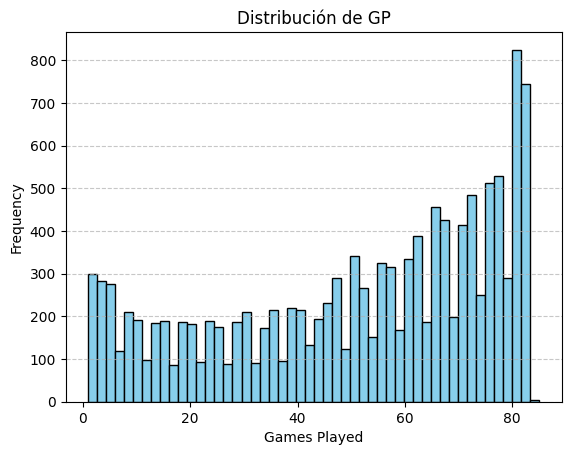

In [395]:
# Distribución partidos jugados

nba_cleanest['gp'].plot.hist(bins=50,edgecolor = 'black', color= 'skyblue')

plt.title('Distribución de GP')
plt.xlabel('Games Played')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha = 0.7)

plt.show

In [396]:
# Estadísticas jugadores que juegan poco

few_matches = nba_cleanest[nba_cleanest['gp'] < 41]

few_matches_clean = few_matches[['gp','draft_round','pts','ast','reb']]

few_matches_clean.describe()

gp          pts          ast          reb
count  4137.000000  4137.000000  4137.000000  4137.000000
mean     19.338893     4.097583     0.948538     2.061591
std      12.111535     3.841375     1.164941     1.721313
min       1.000000     0.000000     0.000000     0.000000
25%       8.000000     1.700000     0.300000     1.000000
50%      19.000000     3.000000     0.600000     1.600000
75%      30.000000     5.100000     1.200000     2.700000
max      40.000000    27.400000    11.100000    16.300000

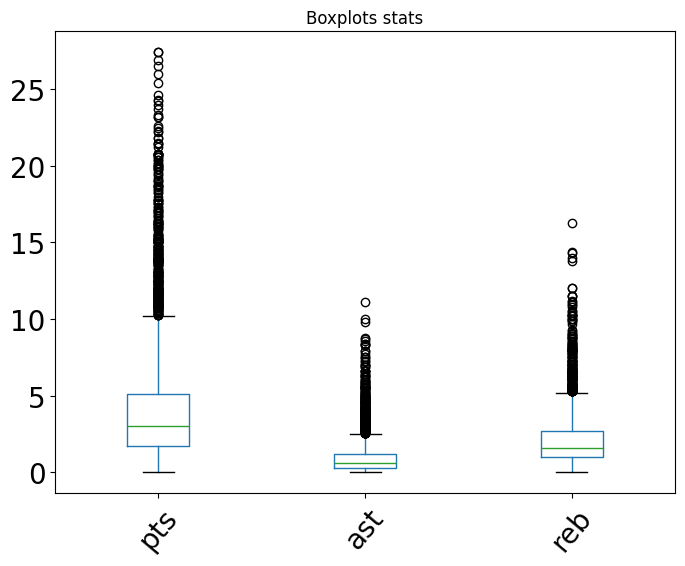

In [397]:
# Grafiquemos este tipo de jugador con Boxplots

boxplot_data = few_matches_clean[['pts','ast','reb']]

plt.figure(figsize=(8, 6))
plt.title('Boxplots stats')
boxplot_data.boxplot(grid=False, rot=50, fontsize=20)
plt.show()

In [398]:
# Outliers de estas distribuciones

few_games_pts = few_matches_clean[few_matches_clean['pts']>10]
few_games_ast = few_matches_clean[few_matches_clean['ast']>2.5]
few_games_reb = few_matches_clean[few_matches_clean['reb']>5]

print(len(few_games_pts['pts']))
print(len(few_games_ast['ast']))
print(len(few_games_reb['reb']))

312
335
231


In [399]:
# Jugadores con más de 41 partidos jugados
condition_1 = nba_cleanest['gp'] > 41

# Jugadores con menos de 41 partidos jugados pero con más de 10 puntos, 2.5 asistencias o 5 rebotes promediados
condition_2 = (nba_cleanest['gp'] <= 41) & ((nba_cleanest['pts'] > 10) | (nba_cleanest['ast'] > 2.5) | (nba_cleanest['reb'] > 5))

# Combinación de ambas
nba_selected_players = nba_cleanest[condition_1 | condition_2]

# Tambien eliminaremos los jugadores que hayan jugado menos del 25% de los partidos (no contamos temporadas de lock-out en los años seleccionados)
nba_selected_players = nba_selected_players[nba_selected_players['gp'] >= 20]

len(nba_selected_players)

9002

In [400]:
# Vamos a aumentar el número de años seleccionados respecto a entregas pasadas para intentar mejorar la precisión
len(nba_selected_players)
nba_recent = nba_selected_players[
    (nba_selected_players['season'] == 3) |
    (nba_selected_players['season'] == 4) |
    (nba_selected_players['season'] == 5) |
    (nba_selected_players['season'] == 6)  |
    (nba_selected_players['season'] == 7) |
    (nba_selected_players['season'] == 8) |
    (nba_selected_players['season'] == 9)  |
    (nba_selected_players['season'] == 10) |
    (nba_selected_players['season'] == 11) |
    (nba_selected_players['season'] == 12) |
    (nba_selected_players['season'] == 13) |
    (nba_selected_players['season'] == 14) |
    (nba_selected_players['season'] == 15) |
    (nba_selected_players['season'] == 16) |
    (nba_selected_players['season'] == 17) |
    (nba_selected_players['season'] == 18) |
    (nba_selected_players['season'] == 19) |
    (nba_selected_players['season'] == 20) |
    (nba_selected_players['season'] == 21) |
    (nba_selected_players['season'] == 22) |
    (nba_selected_players['season'] == 23)
]

print(len(nba_recent))

7160


In [401]:
nba_recent.head()

age  player_height  player_weight draft_round draft_number  gp   pts  \
2639  26.0         210.82     118.841104           1           12  75   4.4   
2640  30.0         200.66     102.058200           1           21  69  19.3   
2641  40.0         198.12      97.975872           1            3  82  20.0   
2643  23.0         198.12      97.522280           2           43  82  15.1   
2645  27.0         210.82     123.377024           2           48  82   9.4   

      reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
2639  2.9  0.6        -5.3     0.076     0.173    0.187   0.451    0.068   
2640  5.8  3.0        12.6     0.044     0.122    0.240   0.514    0.124   
2641  6.1  3.8         0.0     0.028     0.167    0.288   0.491    0.207   
2643  4.5  1.4         2.6     0.050     0.140    0.224   0.590    0.089   
2645  3.9  1.0        -3.0     0.063     0.130    0.211   0.459    0.074   

      season  
2639       3  
2640       3  
2641       3  
2643       3  
2645       3

El primer filtro que aplicaremos es entre los jugadores que han jugado menos de la mitad de los partidos de la temporada regular. A partir de ahí, he detectado que seguimos dejando fuera a jugadores con cierto nivel en la liga, y con estadísticas suficientemente importantes como para tenerlos en cuenta y, por último, sí que he decidido dejar fuera a todos aquellos jugadores que, independientemente de sus promedios, no hayan llegado a jugar el 25% de los partidos de la temporada regular, ya que considero que entre estos, la mayoría será información que no nos interesa.

Por otro lado, he considerado acotar el marco temporal en el que se centrará nuestro estudio de 2019 a la actualidad. Después de temporadas de máxima rivalidad entre tan solo dos equipos, la liga se volvió a igualar y muchos más equipos han tenido opciones de llegar a las finales de la NBA o incluso ganar el anillo durante los últimos 5 años. Han existido remontadas increíbles, equipos 'underdog' llegando a las finales y sorpresas mayúsculas, así que considero que es un buen periodo para estudiar y analizar.

Merece la pena mencionar que en todas las temporadas que analizaremos se jugaron los 81 partidos de temporada regular, es decir, en ninguna de ellas hubo un lockout o reducción de los partidos de la temporada como si sucedió al inicio de la primera década de los 2010.

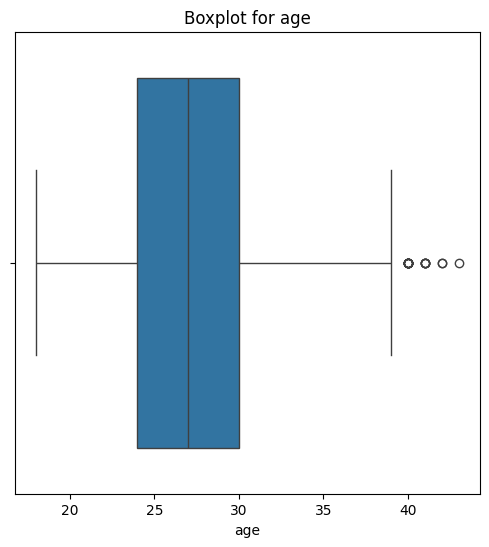

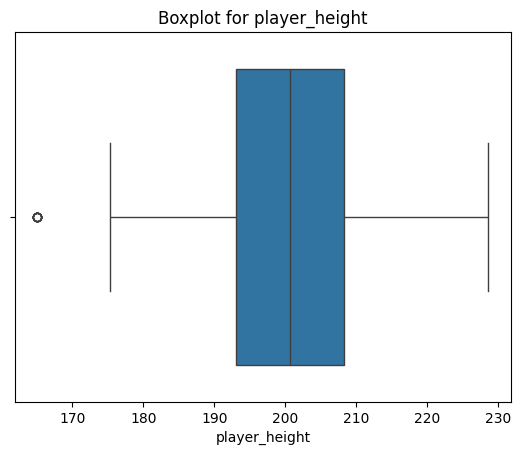

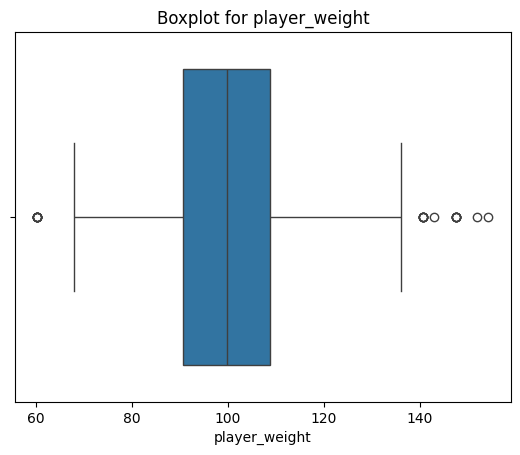

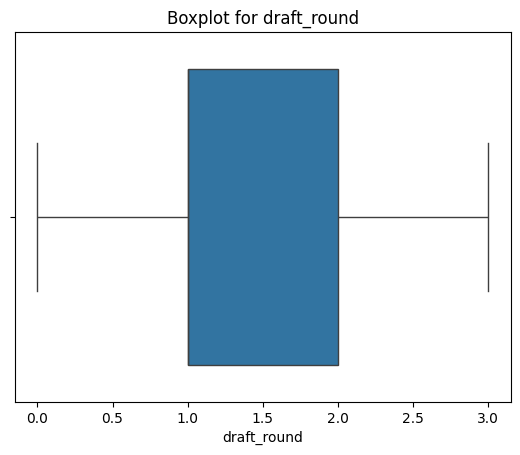

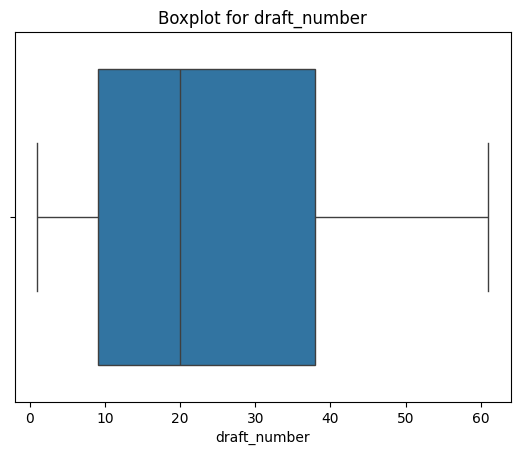

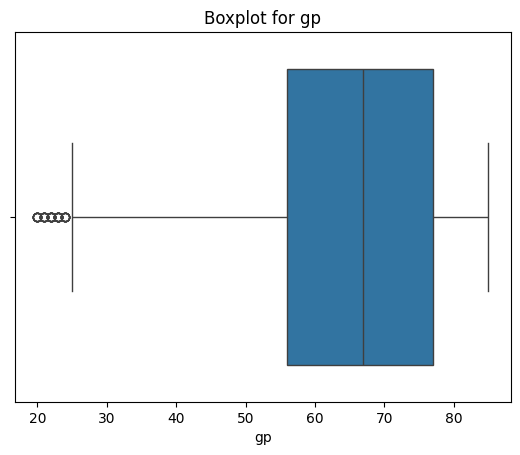

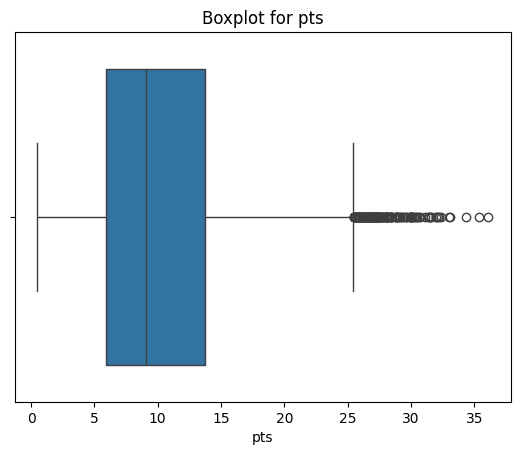

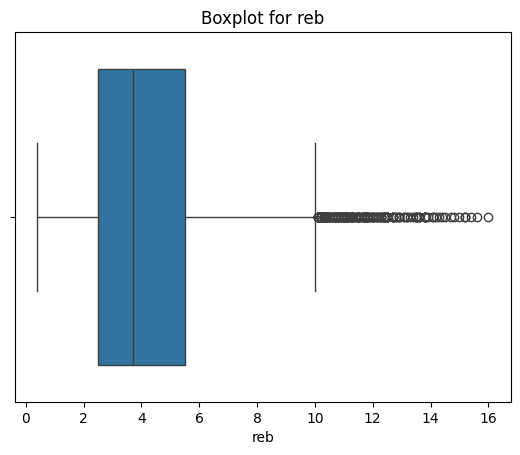

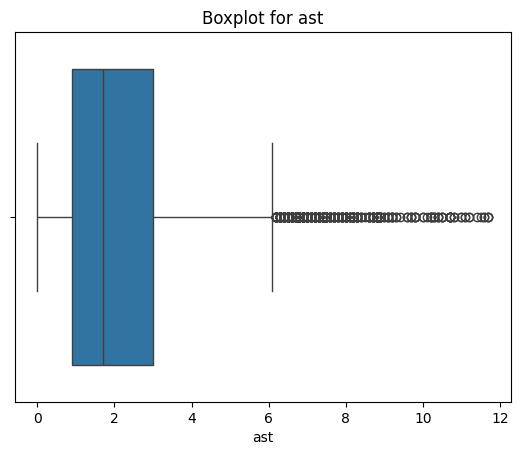

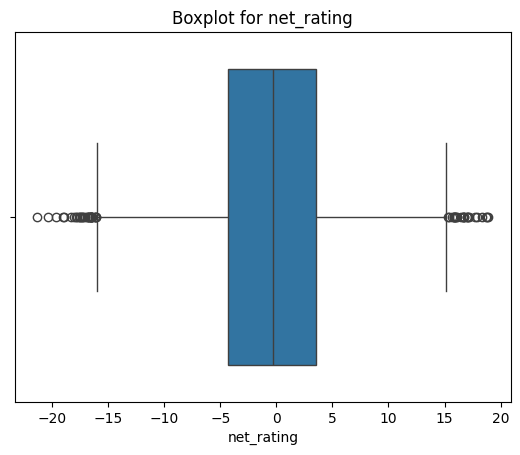

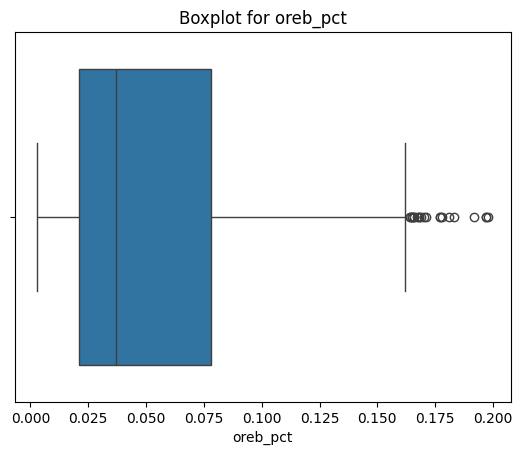

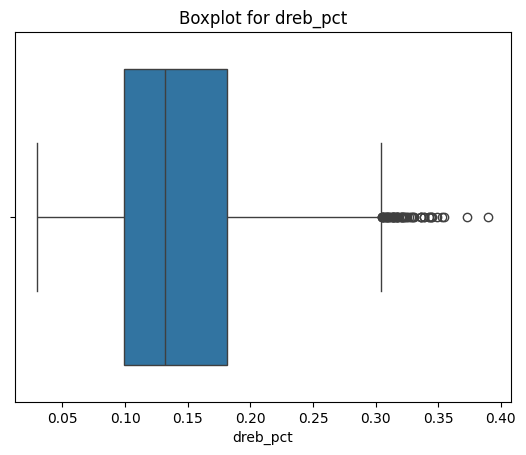

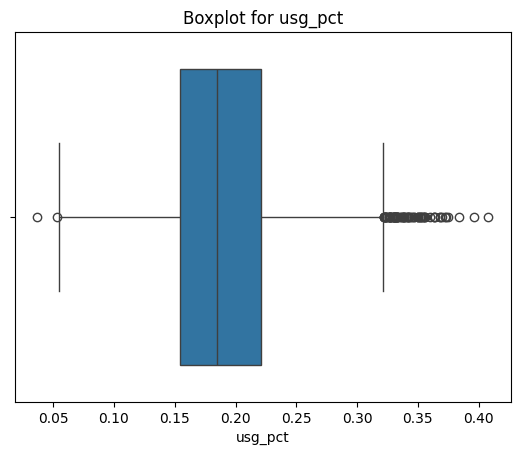

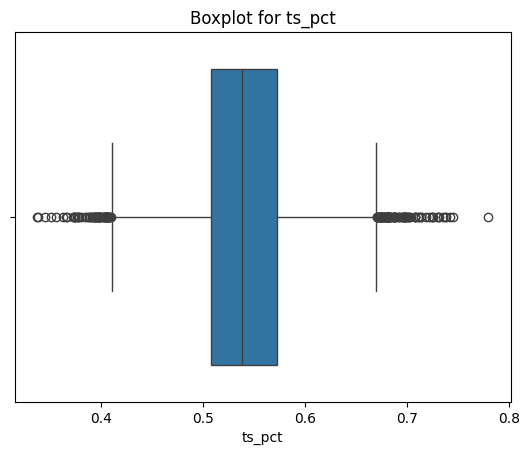

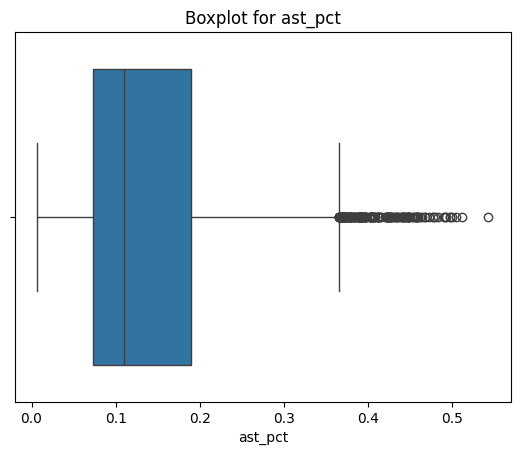

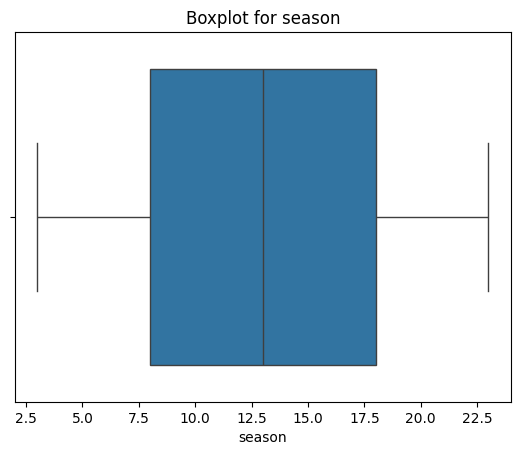

In [402]:
nba_boxplot = nba_recent

plt.figure(figsize=(6, 6))

# Loop through each column in the DataFrame
for column in nba_boxplot.columns:
    # Convert the column values to numeric (ignore errors)
    numeric_values = pd.to_numeric(nba_boxplot[column], errors='coerce')
    
    # Create a boxplot for the current variable
    sns.boxplot(x=numeric_values)
    
    # Set title and labels
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    
    # Show the plot
    plt.show()

Viendo los boxplots, creemos que hay algunos outliers en algunas variables que se pueden tratar. No se analizarán todas las variables porque por el conocimiento adquirido en las anteriores entregas, se sabe o intuye que no todas serán útiles.

**Outliers de la variable Net Rating:**

In [403]:
nba_recent['net_rating'].describe()

count    7160.000000
mean       -0.385726
std         5.825445
min       -21.300000
25%        -4.300000
50%        -0.300000
75%         3.500000
max        18.900000
Name: net_rating, dtype: float64

In [404]:
column = 'net_rating'

third_quartile = np.percentile(nba_boxplot[column].dropna(), 75)
first_quartile = np.percentile(nba_boxplot[column].dropna(), 25)
iqr = third_quartile - first_quartile

upper_limit = third_quartile + 1.5 * iqr
lower_limit = first_quartile - 1.5 * iqr

print(f'El tercer cuartil más 1,5 veces el IQR de {column} es: {upper_limit}')
print(f'El primer cuartil menos 1,5 veces el IQR de {column} es: {lower_limit}')

El tercer cuartil más 1,5 veces el IQR de net_rating es: 15.2
El primer cuartil menos 1,5 veces el IQR de net_rating es: -16.0


In [405]:
# Outliers en Net_Rating - Upper
net_rating_up = nba_recent[nba_recent['net_rating'] > upper_limit]

net_rating_up_clean = net_rating_up[['gp','draft_round','pts','ast','reb','age']]

net_rating_up_clean.describe()

gp        pts        ast        reb        age
count  25.000000  25.000000  25.000000  25.000000  25.000000
mean   65.680000  15.136000   3.764000   6.020000  28.560000
std    13.858571   8.113768   2.309921   3.444803   3.367492
min    34.000000   2.600000   0.200000   1.300000  22.000000
25%    56.000000   7.500000   2.100000   3.400000  26.000000
50%    70.000000  14.300000   3.500000   4.500000  28.000000
75%    77.000000  21.700000   5.600000   8.200000  30.000000
max    81.000000  30.100000   7.700000  13.600000  35.000000

In [406]:
net_rating_up_clean[net_rating_up_clean['gp'] < 41]

gp draft_round   pts  ast  reb   age
7035  34           2  12.9  4.4  3.4  34.0

In [407]:
# Outliers en Net_Rating - Lower
net_rating_low = nba_recent[nba_recent['net_rating'] < lower_limit]

net_rating_low_clean = net_rating_low[['gp','pts','ast','reb','age']]

net_rating_low_clean.describe()

gp        pts        ast        reb        age
count  33.000000  33.000000  33.000000  33.000000  33.000000
mean   49.030303   6.190909   1.115152   3.424242  24.636364
std    12.314841   3.754860   1.007199   1.933266   4.189408
min    24.000000   0.700000   0.100000   0.600000  19.000000
25%    43.000000   3.800000   0.400000   2.000000  21.000000
50%    48.000000   5.500000   0.800000   3.200000  24.000000
75%    54.000000   7.600000   1.500000   4.400000  27.000000
max    81.000000  17.500000   3.900000   8.900000  33.000000

In [408]:
net_rating_low_clean[net_rating_low_clean['gp'] < 41]


gp   pts  ast  reb   age
6908   33   5.5  3.2  2.0  24.0
8280   29  14.8  1.6  4.4  29.0
8330   32   6.7  0.9  5.1  24.0
10941  34   5.5  2.9  2.3  22.0
11898  24  12.9  3.9  3.1  22.0

In [409]:
# Jugadores con net rating muy neagtivo 
condition_1 = nba_recent['net_rating'] < lower_limit
condition_2 = nba_recent['net_rating'] > upper_limit
condition_3 = nba_recent['gp'] < 41

# Combinación de ambas
unselected = condition_1 & condition_3 | condition_2 & condition_3

nba_recent = nba_recent[~unselected]
len(nba_recent)


7154

Después de analizar los datos de net_rating me he dado cuenta de que tenía que ser bastante restrictivo porque los net_ratings de jugadores que han jugado muchos partidos pueden darnos bastante información. Normalmente, un net_rating muy negativo implica que el jugador ayuda poco al equipo, pero, además, nos da información sobre la situación y calidad del equipo en el que juega.

**Outliers de la variable True Shooting Percentage:**

In [410]:
nba_recent['ts_pct'].describe()

count    7154.000000
mean        0.540548
std         0.051684
min         0.338000
25%         0.508000
50%         0.539000
75%         0.573000
max         0.780000
Name: ts_pct, dtype: float64

In [411]:
column = 'ts_pct'

third_quartile = np.percentile(nba_boxplot[column].dropna(), 75)
first_quartile = np.percentile(nba_boxplot[column].dropna(), 25)
iqr = third_quartile - first_quartile

upper_limit = third_quartile + 1.5 * iqr
lower_limit = first_quartile - 1.5 * iqr

print(f'El tercer cuartil más 1,5 veces el IQR de {column} es: {upper_limit}')
print(f'El primer cuartil menos 1,5 veces el IQR de {column} es: {lower_limit}')

El tercer cuartil más 1,5 veces el IQR de ts_pct es: 0.6704999999999999
El primer cuartil menos 1,5 veces el IQR de ts_pct es: 0.4105000000000001


In [412]:
# Outliers en True Shooting - Upper
ts_up = nba_recent[nba_recent['ts_pct'] > upper_limit]

ts_up_clean = ts_up[['gp','draft_round','pts','ast','reb','age','ts_pct']]

ts_up_clean.describe()

gp        pts        ast        reb        age     ts_pct
count  85.000000  85.000000  85.000000  85.000000  85.000000  85.000000
mean   61.152941   9.124706   1.302353   6.211765  27.035294   0.694988
std    11.729598   4.770467   1.384951   3.429474   3.880498   0.021686
min    35.000000   2.300000   0.100000   1.100000  20.000000   0.671000
25%    52.000000   5.900000   0.600000   3.800000  24.000000   0.680000
50%    61.000000   8.700000   0.900000   5.600000  27.000000   0.688000
75%    71.000000  10.600000   1.400000   8.300000  30.000000   0.703000
max    82.000000  29.100000   9.800000  14.700000  35.000000   0.780000

In [413]:
ts_up_clean[ts_up_clean['gp'] < 41]

gp draft_round  pts  ast  reb   age  ts_pct
10911  40           2  9.4  1.5  5.7  28.0   0.677
12339  35           1  8.0  1.4  8.3  25.0   0.742
12510  39           2  5.1  0.9  5.2  34.0   0.731

In [414]:
# Outliers en True Shooting - Lower
ts_low = nba_recent[nba_recent['ts_pct'] < lower_limit]

ts_low_clean = ts_low[['gp','draft_round','pts','ast','reb','age','ts_pct']]

ts_low_clean.describe()

gp        pts        ast        reb        age     ts_pct
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000
mean   54.098361   2.747541   1.334426   2.172131  26.393443   0.389639
std    14.125279   1.208388   1.162165   1.547162   4.619808   0.018033
min    23.000000   0.700000   0.200000   0.600000  18.000000   0.338000
25%    45.000000   2.000000   0.500000   1.200000  23.000000   0.378000
50%    51.000000   2.600000   0.900000   1.700000  26.000000   0.395000
75%    64.000000   3.200000   1.900000   2.700000  29.000000   0.404000
max    82.000000   6.600000   4.400000   8.800000  37.000000   0.410000

In [415]:
ts_low_clean[ts_low_clean['gp'] < 41]

gp draft_round  pts  ast  reb   age  ts_pct
3423   33           1  3.5  2.6  2.0  33.0   0.399
5446   32           1  6.6  3.1  2.4  28.0   0.410
5530   23           1  3.8  3.3  1.2  32.0   0.377
8305   34           2  4.3  3.1  1.4  22.0   0.394
8667   29           1  4.3  3.8  8.8  31.0   0.406
12575  37           1  5.0  2.6  2.2  20.0   0.393

La realidad es que después de analizar los datos de ts_pct, no veo la razón por la que deberíamos eliminar las observaciones que me parecían más sospechosas. Todos los jugadores con un ts_pct alto parecen ser jugadores interiores con una dificultad de tiro baja y creo que al eliminarlos, tanto a ellos como a los del ts_pct bajo (que son principalmente bases con un tiro poco fiable) estaríamos eliminando jugadores de un tipo muy concreto que puede enriquecer al modelo.

# Exploracion de los datos restantes

<Axes: >

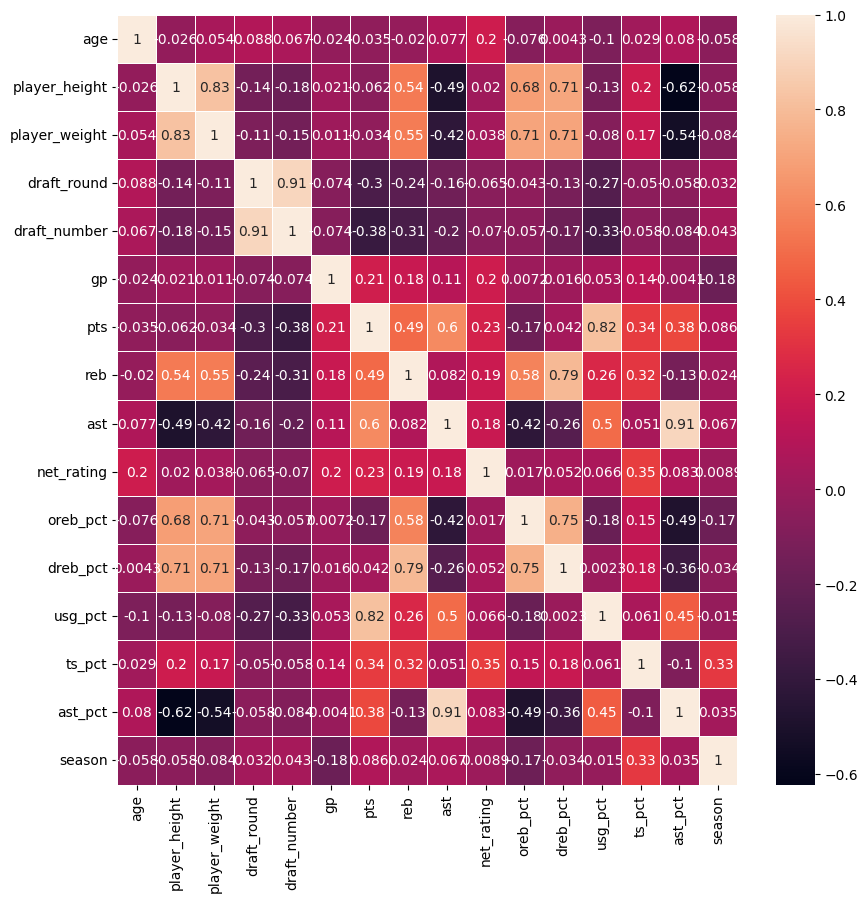

In [416]:
# Graficamos la matriz de correlación de las variables que nos quedamos hasta ahora

plt.figure(figsize=(10, 10))
sns.heatmap(nba_recent.corr(), annot = True, linewidths=0.5)

Con esta información, nos damos cuenta de que hay variables muy correlacionadas que pueden amplificar su información indebidamente y que creo oportuno eliminar antes de seguir con el análisis. El 'thereshold' usado es 0,75 de correlación.

- El peso y la altura, son dos variables que nos aportan prácticamente lo mismo, así que una de las dos debería ser eliminada. Inicialmente, tenía pensado solo eliminar una, pero viendo que ambas variables están altamente relacionadas con diversas más, he decidió eliminar las dos. Para este estudio prefiero céntrame en variables relacionadas con el juego.
- Asistencias y Ast_pct, también lo están por encima del 75% y, tiene sentido, miden cosas muy similares. En este caso, vamos a eliminar el ast_pct para analizar el valor total de asistencias y no la estadística avanzada. También está más relacionada con peso y altura, así que me parece lo correcto.
- También vemos que los puntos están altamente relacionados con el usg_pct, cosa que tiene sentido debido al tipo de juego, especialmente de los bases de la liga, de los últimos años. Eliminaremos el usg_pct, ya que valoro los puntos como una estadística más importante.
- Otras variables que están relacionadas con los rebotes con los dreb_pct. Aquí sucede lo mismo, valoro quedarme con los rebotes totales, ya que nos dan más información global y eliminaré la variable dreb_pct.
- Draft_round y draft_number también lo están en exceso, así que vamos a eliminar una de las dos.

In [417]:
variables_correlacionadas = nba_recent[['draft_round','player_weight','player_height','ast_pct','usg_pct','dreb_pct']]
nba_recent = nba_recent.drop(columns = variables_correlacionadas)
nba_recent.head()

age draft_number  gp   pts  reb  ast  net_rating  oreb_pct  ts_pct  \
2639  26.0           12  75   4.4  2.9  0.6        -5.3     0.076   0.451   
2640  30.0           21  69  19.3  5.8  3.0        12.6     0.044   0.514   
2641  40.0            3  82  20.0  6.1  3.8         0.0     0.028   0.491   
2643  23.0           43  82  15.1  4.5  1.4         2.6     0.050   0.590   
2645  27.0           48  82   9.4  3.9  1.0        -3.0     0.063   0.459   

      season  
2639       3  
2640       3  
2641       3  
2643       3  
2645       3

<Axes: >

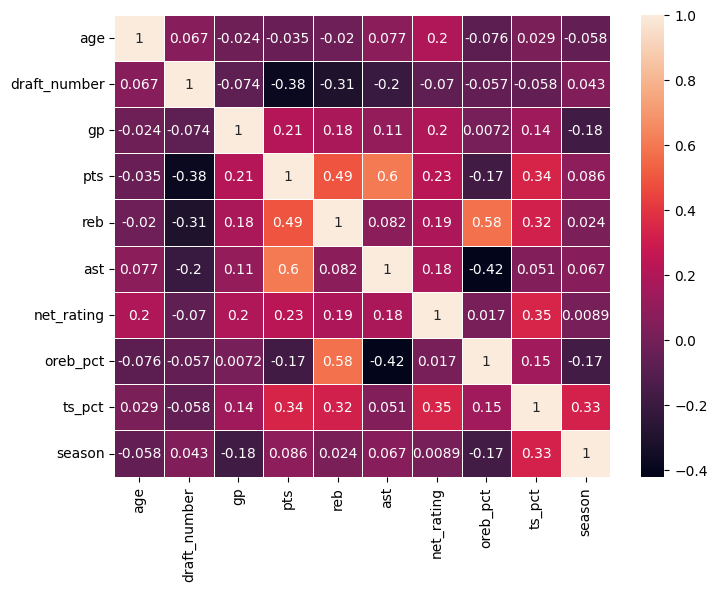

In [418]:
# Graficamos la matriz de correlación de las variables restantes
plt.figure(figsize=(8, 6))
sns.heatmap(nba_recent.corr(), annot = True, linewidths=0.5)

<Figure size 2000x1000 with 0 Axes>

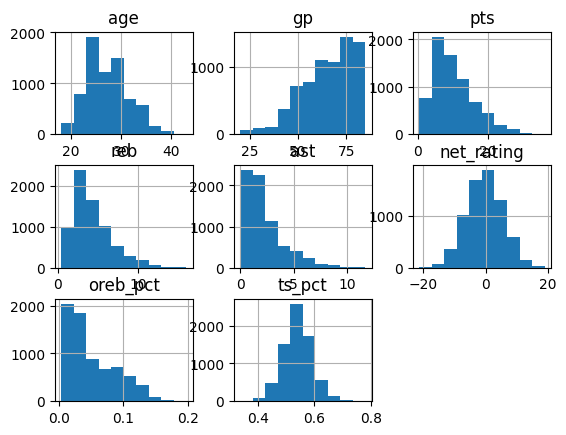

In [419]:
season = ['season']
nba_hist = nba_recent.drop(columns=season)

plt.figure(figsize = (20,10))
nba_hist.hist()
plt.show()

# Variable Objetivo: Puntos

Nuestra variable objetivo en este análisis va a ser la variable puntos. Hemos visto que es una variable que está un poco más correlacionada que las dos que he creado para anteriores entregas, así que intentaremos ver los cambios que hay en este caso usando una variable que parece que nos puede dar mejores resultados.

Antes de empezar, quiero crear tres grupos de la variable puntos para poder graficar un pairplot y ver si de entrada los datos están relativamente separados. Además, más adelante esta nueva variable categórica nos va a servir para hacer un análisis de información mutua.

In [420]:
# Repaso concreto de las correalciones con la variable objetivo
correlations = nba_recent.corr()
corr_pts = correlations['pts']
corr_pts

age            -0.035072
draft_number   -0.376668
gp              0.211583
pts             1.000000
reb             0.490360
ast             0.602994
net_rating      0.229335
oreb_pct       -0.171168
ts_pct          0.335066
season          0.086457
Name: pts, dtype: float64

In [421]:
# Crear la variable categórica puntos
nba_recent['pts_class'] = pd.cut(nba_recent['pts'],
                                    bins=[float('-inf'),10, 20, float('inf')],
                                    labels=[0, 1, 2],
                                    include_lowest=True)

nba_recent.head()

age draft_number  gp   pts  reb  ast  net_rating  oreb_pct  ts_pct  \
2639  26.0           12  75   4.4  2.9  0.6        -5.3     0.076   0.451   
2640  30.0           21  69  19.3  5.8  3.0        12.6     0.044   0.514   
2641  40.0            3  82  20.0  6.1  3.8         0.0     0.028   0.491   
2643  23.0           43  82  15.1  4.5  1.4         2.6     0.050   0.590   
2645  27.0           48  82   9.4  3.9  1.0        -3.0     0.063   0.459   

      season pts_class  
2639       3         0  
2640       3         1  
2641       3         1  
2643       3         1  
2645       3         0

In [422]:
pts1 = nba_recent[nba_recent['pts_class'] == 0]
pts2 = nba_recent[nba_recent['pts_class'] == 1]
pts3 = nba_recent[nba_recent['pts_class'] == 2]

print(len(pts1))
print(len(pts2))
print(len(pts3))

4018
2569
567


In [423]:
pts_1 = 0
pts_2 = 1
pts_3 = 2
reduced_1 = 0.75
reduced_2 = 0.60
reduced_3 = 0.01

indices1 = nba_recent[nba_recent['pts_class'] == pts_1].index
indices2 = nba_recent[nba_recent['pts_class'] == pts_2].index
indices3 = nba_recent[nba_recent['pts_class'] == pts_3].index

np.random.seed(33)

reduced1 = np.random.choice(indices1, size=int(len(indices1) * reduced_1), replace=False)
reduced2 = np.random.choice(indices2, size=int(len(indices2) * reduced_2), replace=False)
reduced3 = np.random.choice(indices3, size=int(len(indices3) * reduced_3), replace=False)


nba_pairplot = nba_recent.drop(set(reduced1).union(set(reduced2)).union(set(reduced3)))

In [424]:
pts1 = nba_pairplot[nba_pairplot['pts_class'] == 0]
pts2 = nba_pairplot[nba_pairplot['pts_class'] == 1]
pts3 = nba_pairplot[nba_pairplot['pts_class'] == 2]

print(len(pts1))
print(len(pts2))
print(len(pts3))

1005
1028
562


<Figure size 1500x1500 with 0 Axes>

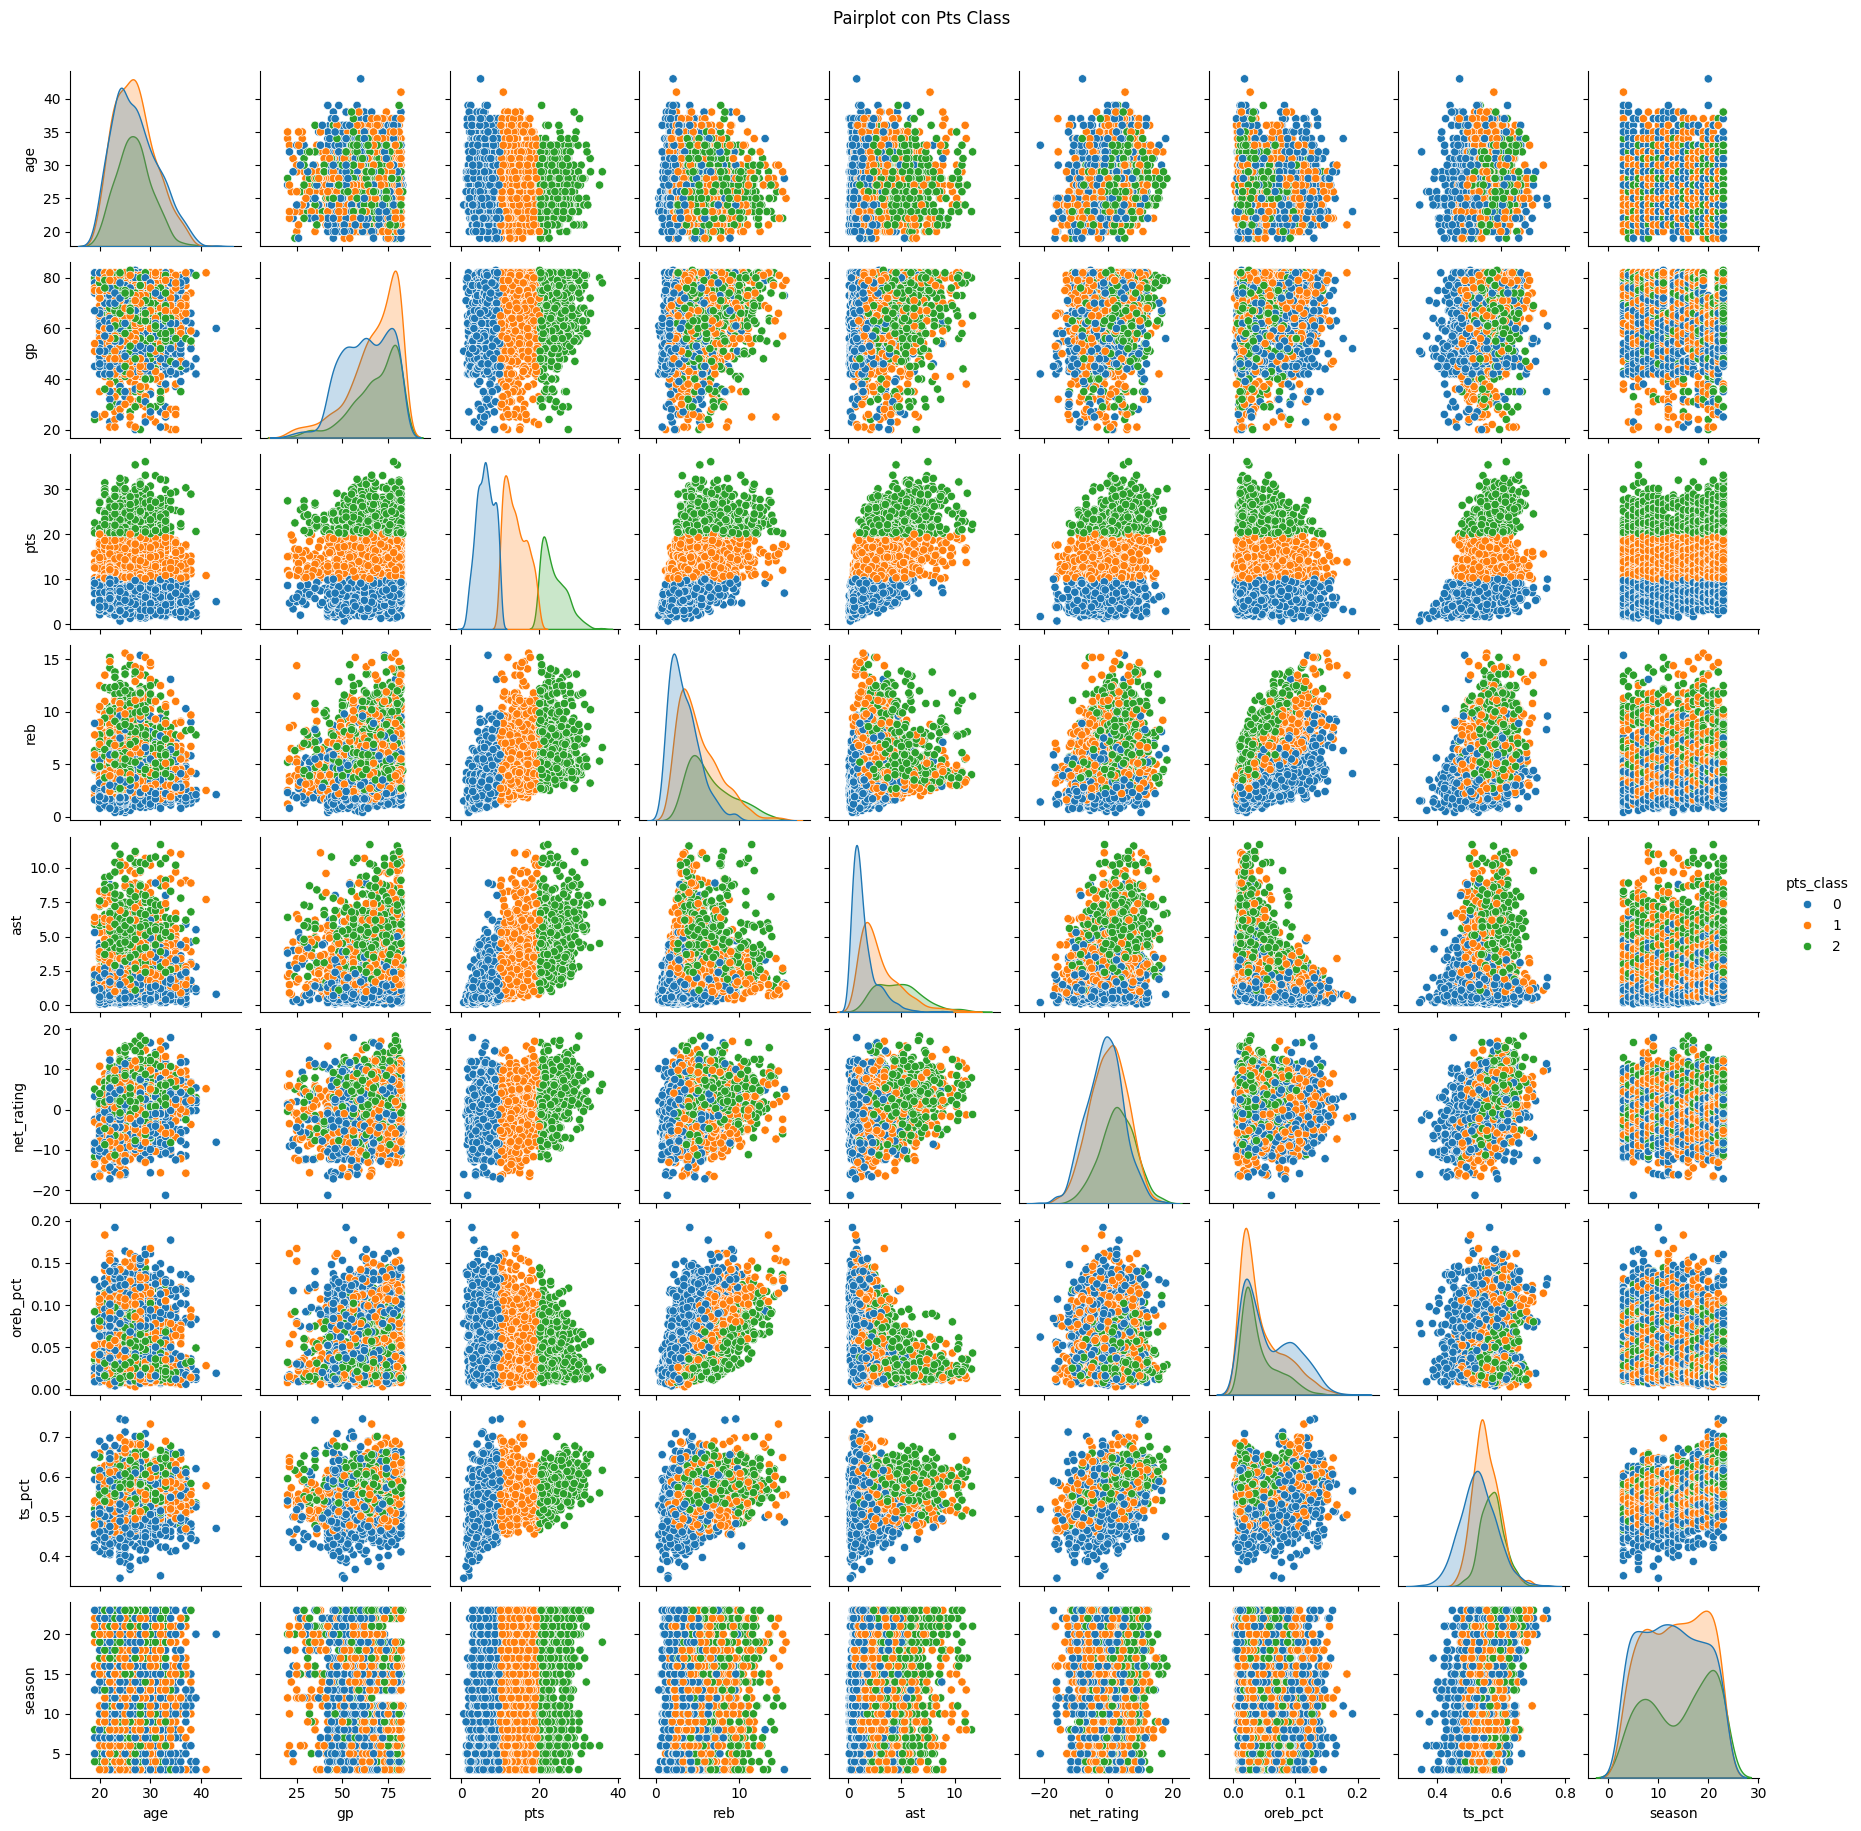

In [425]:
plt.figure(figsize=(15, 15)) 
sns.pairplot(nba_pairplot, height=2, palette='tab10', hue='pts_class')
plt.suptitle('Pairplot con Pts Class', y=1.02) 
plt.show()

Realmente en el gráfico de arriba vemos que hay menos separabilidad de lo que igual nos esperábamos, pero si nos fijamos en los gráficos entre pts y las demás variables sí que vemos un poco de correlación en algunos casos.

Evidentemente, sí que vemos separabilidad en la variable puntos, pero no tiene importancia, ya que la categórica sale de ahí.

Mencionar que primero hemos intentado balancear los datos para no tener sobrerrepresentaron de alguna clase en el gráfico.

In [426]:
# Eliminar algunos datos de la variable objetivo (parte opcional)
np.random.seed(79)
nba_recent["pts"] = nba_recent["pts"].mask(np.random.rand(len(nba_recent)) < 0.05)

In [427]:
nba_recent.isnull().sum()

age               0
draft_number      0
gp                0
pts             374
reb               0
ast               0
net_rating        0
oreb_pct          0
ts_pct            0
season            0
pts_class         0
dtype: int64

In [428]:
nba_recent_null = nba_recent[nba_recent['pts'].isnull()]
nba_recent_wnull = nba_recent
nba_recent = nba_recent.dropna(subset = ['pts'])

In [429]:
print(len(nba_recent))
print(len(nba_recent_wnull))
print(len(nba_recent_null))

6780
7154
374


# Modelo de Regresión

A continuación implementaremos un modelo de regresión, pero antes, me gustaría intentar tener algo más de información sobre las variables que debemos incluir en el modelo, así que vamos a hacer un pequeño estudio de información mutua y de análisis de los componentes para hacer un filtrado de variables en caso de que sea necesario.

**Información Mutua**

Empezaremos usando un algoritmo de entropía para intentar detectar que variables de las que tenemos en el dataset nos dan más información sobre la variable objetivo. Como el análisis de información mutua solo nos sirve para casos en los que la variable sea discreta, he decidido mantener la variable creada previamente para así usarla. Los resultados serán menos precisos, pero nos ayudarán a tener más conocimiento de los datos que usamos.

C:\Users\Marc\AppData\Local\Temp\ipykernel_12560\2830079165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='attributes', data=ig_df, palette='tab10')


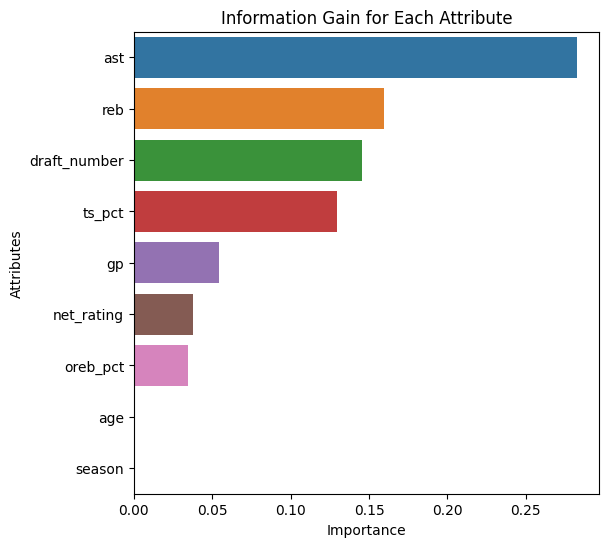

In [430]:
features = nba_pairplot.drop(columns=['pts_class','pts'])

# Calculate information gain
info_gain = mutual_info_classif(features, nba_pairplot['pts_class'])

# Create a DataFrame for plotting
ig_df = pd.DataFrame({'attributes': features.columns, 'importance': info_gain})
ig_df = ig_df.sort_values(by='importance', ascending=False)

# Plot the information gain
plt.figure(figsize=(6, 6))
sns.barplot(x='importance', y='attributes', data=ig_df, palette='tab10')
plt.title('Information Gain for Each Attribute')
plt.xlabel('Importance')
plt.ylabel('Attributes')
plt.show()

Con este gráfico, observamos que la variable que más información nos da sobre la objetivo son las asistencias. Esto no es nuevo porque a su vez era la que estaba más correlada. Si es interesante ver como tanto la edad como la temporada son dos variables que nos dan prácticamente 0 información. Tampoco nos aportan demasiada oreb_pct, gp y net_rating.

Una opción que he pensado para mejorar la precisión de estos resultados es fraccionar la variable de clase de puntos en muchísimos más grupos (y más pequeños) de tal manera que, aunque sea una variable discreta, disponga de mucho más detalle.

**PCA**

In [431]:
# Eliminamos variable categorica
nba_recent = nba_recent.drop(columns = ['pts_class'])

In [432]:
nba_recent_pca = nba_recent.drop(columns = ['pts'])

In [433]:
#PCA
pca = PCA()
x_pca = pca.fit_transform(nba_recent_pca)

explained_variance = pd.Series(pca.explained_variance_ratio_)
print(explained_variance.round(2))

0    0.58
1    0.28
2    0.06
3    0.05
4    0.02
5    0.01
6    0.01
7    0.00
8    0.00
dtype: float64


In [434]:
variable_importance = pd.DataFrame(pca.components_.T, columns = [f'Componente {i+1}' 
                                    for i in range(pca.components_.shape[0])], index = nba_recent_pca.columns)
print(variable_importance.round(2))

              Componente 1  Componente 2  Componente 3  Componente 4  \
age                   0.02          0.00         -0.06          0.32   
draft_number          0.99         -0.11         -0.00          0.02   
gp                   -0.10         -0.98         -0.03         -0.13   
reb                  -0.04         -0.02         -0.06          0.04   
ast                  -0.02         -0.01         -0.05          0.03   
net_rating           -0.03         -0.10         -0.49          0.81   
oreb_pct             -0.00         -0.00          0.00          0.00   
ts_pct               -0.00         -0.00         -0.00          0.00   
season                0.02          0.09         -0.87         -0.48   

              Componente 5  Componente 6  Componente 7  Componente 8  \
age                   0.94          0.02         -0.04         -0.00   
draft_number         -0.02          0.04          0.02         -0.00   
gp                    0.04         -0.02         -0.01         

Los dos componentes más importantes son el primero y el segundo, ya que con ellos explicamos un 88% de la varianza, es por esto que tenemos que mirar las variables que tienen importancia dentro de estos componentes. Al hacerlo, vemos que 'draft_number' y 'gp' son, con diferencia, las más importantes.

Así que vamos a empezar probando un modelo con estas dos variables más las otras 3 variables que en el estudio de información mutua nos han aparecido como variables importantes para nuestra varaible objetivo. Haremos un modelo tanto linear como polinómico y de esta manera ver las diferencias en los resultados.

In [435]:
# Datos que usaremos más adelante
nba_recent_all = nba_recent.copy()

In [436]:
nba_model = nba_recent[['pts','draft_number', 'reb','ts_pct','ast','gp']]
nba_model.head()

pts draft_number  reb  ts_pct  ast  gp
2639   4.4           12  2.9   0.451  0.6  75
2640  19.3           21  5.8   0.514  3.0  69
2641  20.0            3  6.1   0.491  3.8  82
2643  15.1           43  4.5   0.590  1.4  82
2645   9.4           48  3.9   0.459  1.0  82

In [437]:
X = nba_model.drop("pts", axis=1)  
y = nba_model["pts"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (5424, 5) (5424,)
Test: (1356, 5) (1356,)


In [438]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [439]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coeficiente de determinación (R^2): {:.4f}".format(r2))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Coeficiente de determinación (R^2): 0.6076
Root Mean Squared Error (RMSE): 3.62


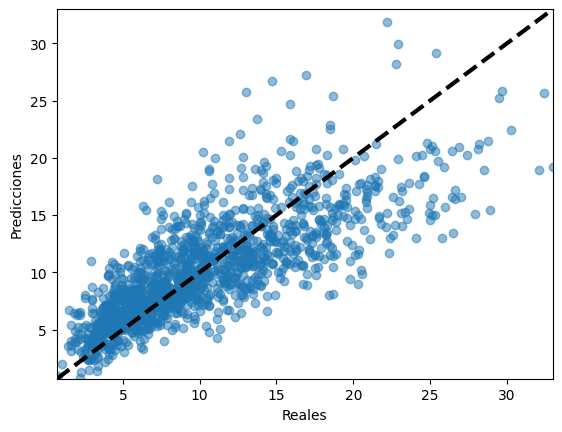

In [440]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=3)

plt.xlim([min(y_test), max(y_test)])  
plt.ylim([min(y_test), max(y_test)])  

plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.show()

In [441]:
best_degree = 0
best_r2 = -float('inf')

for degree in range(2, 8):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    y_pred = poly_model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

    print(f'Grado: {degree}, R-squared: {r2}')

print(f'Mejor Grado: {best_degree}, Best R-squared: {best_r2}')

Grado: 2, R-squared: 0.689887548812687
Grado: 3, R-squared: 0.6897024202769833
Grado: 4, R-squared: 0.7029037567984544
Grado: 5, R-squared: 0.4971353808373128


Grado: 6, R-squared: 0.6276238078217282
Grado: 7, R-squared: -38.755179590126474
Mejor Grado: 4, Best R-squared: 0.7029037567984544


In [442]:
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Con los datos preparados para un polinomio, añadimos el entrenamiento para la regresión
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

#Predicciones
y_pred2 = poly_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print('Mean squared error:', mse)
print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)

Mean squared error: 9.939480839394134
R-squared: 0.7029037567984544
Root Mean Squared Error: 3.152694219139264


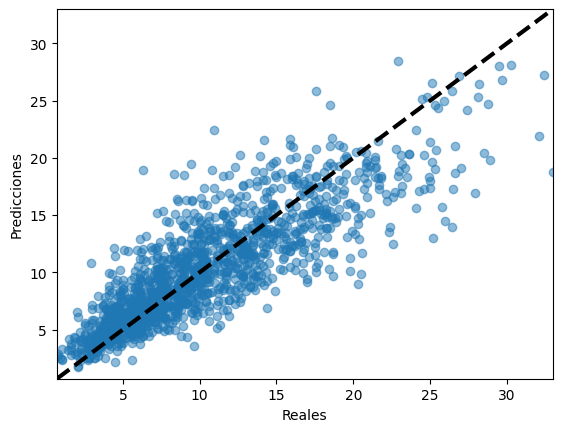

In [443]:
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=3)

# Adjust the x and y axis limits to change the scale
plt.xlim([min(y_test), max(y_test)])  # Set x-axis limits based on y_test values
plt.ylim([min(y_test), max(y_test)])  # Set y-axis limits based on y_test values

plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.show()

Los dos primeros modelos que hemos hecho han sido el modelo de regresión lineal con 5 variables y una regresión polinómica con las mismas variables. Se observa en los resultados que el segundo modelo predice mejor

- Por un lado, el lineal tiene una precisión del 60% aproximadamente y un error a escala un poco superior a las 3 unidades
- En cambio, el segundo modelo mejora estos resultados con un 70% de precisión y un error inferior

Para seleccionar el grado polinomial del segundo modelo hemos probado todos los grados entre 2 y 7 para intentar seleccionar el que maximizase la R-squared y el que mejor funciona es el grado 4.

Al graficar, observamos consonancia con los resultados. Estamos graficando los valores predichos por el modelo contra los valores reales e incluyendo una diagonal que representa como deberían estar los datos en caso de que tuviéramos un modelo perfecto y de una precisión del 100%. Como no es el caso, en ambos casos vemos que hay bastante dispersión, evidentemente, esta se ajusta un poco en el segundo, ya que es más preciso y tiene un error menor.


**Modelos con todas las variables del dataset**

In [444]:
X_all = nba_recent_all.drop("pts", axis=1)  
y_all = nba_recent_all["pts"]

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=55)

print("Train:", X_train_all.shape, y_train_all.shape)
print("Test:", X_test_all.shape, y_test_all.shape)

Train: (5424, 9) (5424,)
Test: (1356, 9) (1356,)


In [445]:
scaler = StandardScaler()

X_train_all = pd.DataFrame(scaler.fit_transform(X_train_all), columns = X_train_all.columns)
X_test_all= pd.DataFrame(scaler.transform(X_test_all), columns = X_test_all.columns)

In [446]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train_all, y_train_all)

# Evaluar el modelo
y_pred_all = model.predict(X_test_all)

r2 = r2_score(y_test_all, y_pred_all)
mse = mean_squared_error(y_test_all, y_pred_all)
rmse = np.sqrt(mse)

print("Coeficiente de determinación (R^2): {:.4f}".format(r2))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Coeficiente de determinación (R^2): 0.6904
Root Mean Squared Error (RMSE): 3.22


In [447]:
best_degree = 0
best_r = -float('inf')

for degree in range(2, 6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_all)
    X_test_poly = poly.fit_transform(X_test_all)

    poly_model2 = LinearRegression()
    poly_model2.fit(X_train_poly, y_train_all)

    y_pred = poly_model2.predict(X_test_poly)
    r2 = r2_score(y_test_all, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

    print(f'Grado: {degree}, R-squared: {r2}')

print(f'Mejor Grado: {best_degree}, Best R-squared: {best_r2}')

Grado: 2, R-squared: 0.7543558806272426


Grado: 3, R-squared: 0.7466243091000728
Grado: 4, R-squared: 0.70545933622102
Grado: 5, R-squared: 0.1730801563056371
Mejor Grado: 2, Best R-squared: 0.7543558806272426


In [448]:
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train_all)
X_test_poly = poly.fit_transform(X_test_all)

# Con los datos preparados para un polinomio, añadimos el entrenamiento para la regresión
poly_model2 = LinearRegression()
poly_model2.fit(X_train_poly, y_train_all)

#Predicciones
y_pred_all = poly_model2.predict(X_test_poly)

mse = mean_squared_error(y_test_all, y_pred_all)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_all, y_pred_all)
print('Mean squared error:', mse)
print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)

Mean squared error: 8.218128211601252
R-squared: 0.7543558806272426
Root Mean Squared Error: 2.8667277881935793


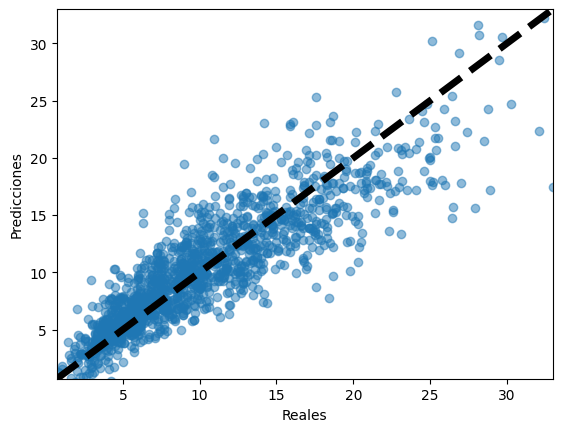

In [449]:
plt.scatter(y_test, y_pred_all, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=5)

# Adjust the x and y axis limits to change the scale
plt.xlim([min(y_test), max(y_test)])  # Set x-axis limits based on y_test values
plt.ylim([min(y_test), max(y_test)])  # Set y-axis limits based on y_test values

plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.show()

Por otro lado, también he querido probar de crear un modelo con todas las variables que nos han quedado en el dataset después de haber eliminado unas pocas en el análisis de correlaciones. Al hacerlo, estamos incluyendo ya 9 variables dependientes y observamos que la precisión del modelo aumenta. La R^2 es ahora de 0,75 y en consecuencia también se ve como el scatter que contrasta datos reales con precisiones, cada vez está un poco más cercano a la línea indicadora de un modelo con una precisión perfecta.

**Modelos con las dos variables del PCA**

In [450]:
nba_recent_pca = nba_recent[['pts','draft_number','gp']]

In [451]:
X_pca = nba_recent_pca.drop("pts", axis=1)  
y_pca = nba_recent_pca["pts"]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=55)

print("Train:", X_train_pca.shape, y_train_pca.shape)
print("Test:", X_test_pca.shape, y_test_pca.shape)

Train: (5424, 2) (5424,)
Test: (1356, 2) (1356,)


In [452]:
scaler = StandardScaler()

X_train_pca = pd.DataFrame(scaler.fit_transform(X_train_pca), columns = X_train_pca.columns)
X_test_pca= pd.DataFrame(scaler.transform(X_test_pca), columns = X_test_pca.columns)

In [453]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train_pca, y_train_pca)

# Evaluar el modelo
y_pred_pca = model.predict(X_test_pca)

r2 = r2_score(y_test_pca, y_pred_pca)
mse = mean_squared_error(y_test_pca, y_pred_pca)
rmse = np.sqrt(mse)

print("Coeficiente de determinación (R^2): {:.4f}".format(r2))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Coeficiente de determinación (R^2): 0.1641
Root Mean Squared Error (RMSE): 5.29


Por último, he querido también probar de crear un modelo con tan solo dos variables. Estas son las variables que hemos extraído del análisis de componentes como aquellas que nos ayudaban más a describir la varianza de la variable objetivo.

Como vemos en los resultados, una R^2 de 0,16 no es aceptable, así que este modelo se debe descartar como opción para hacer predicciones sobre la variable objetivo.

# Árbol de Decisión

In [454]:
time_1 = time.time()
arbol = DecisionTreeRegressor(random_state=79)
arbol.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 79,
 'splitter': 'best'}

In [455]:
# Búsqueda del mejor parámetro
param_grid = {"max_depth": [2, 4, 6, 8]}
dtr_grid = GridSearchCV(arbol, param_grid, cv=3, scoring= "r2")

dtr_grid.fit(X_train, y_train)

print("Mejores parámetros:", dtr_grid.best_params_)

Mejores parámetros: {'max_depth': 6}


In [456]:
arbol_opt = dtr_grid.best_estimator_

time_2 = time.time()
total_time = time_2 - time_1
print(f'Tiempo de ejecución del Árbol de Decisión parametrizado: {total_time} segundos')

# Evaluar el modelo
y_pred = arbol_opt.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coeficiente de determinación (R^2): {:.4f}".format(r2))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Tiempo de ejecución del Árbol de Decisión parametrizado: 0.254741907119751 segundos
Coeficiente de determinación (R^2): 0.6591
Root Mean Squared Error (RMSE): 3.38


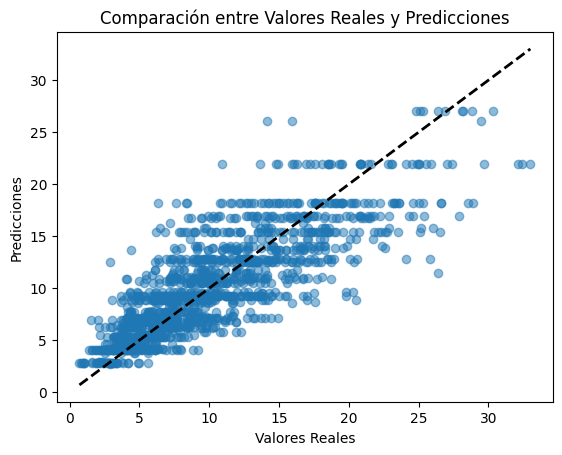

In [457]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)
plt.title("Comparación entre Valores Reales y Predicciones")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

In [458]:
arbol2 = DecisionTreeRegressor(random_state=79, max_depth=2)
arbol2.fit(X_train, y_train)
y_pred2 = arbol2.predict(X_test)

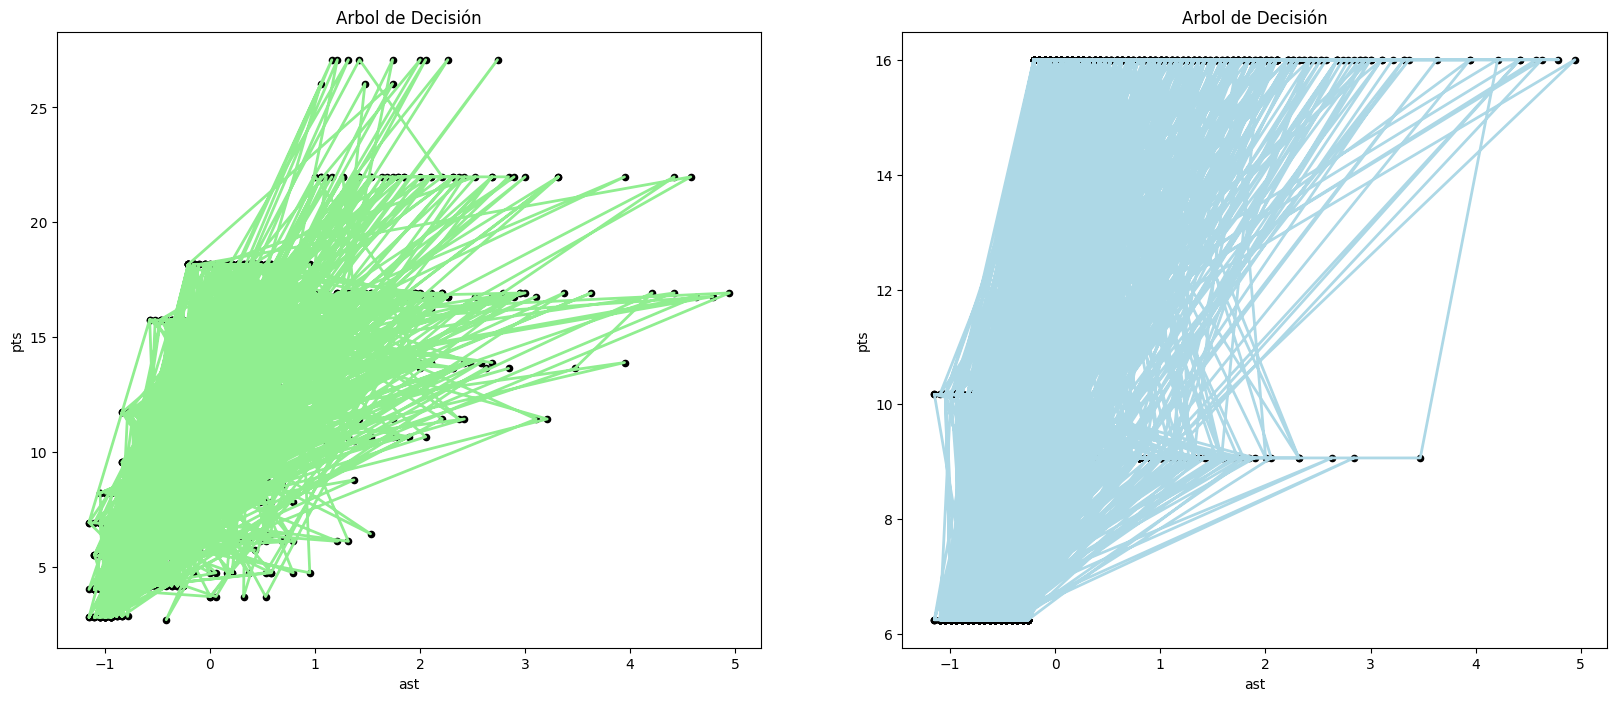

In [354]:
fig, axs = plt.subplots(1,2, figsize = (20,8))

axs[0].scatter(X_test["ast"], y_pred, s=20, edgecolor="black", c="black")
axs[0].plot(X_test["ast"], y_pred, color="lightgreen", label="max_depth=6", linewidth=2)
axs[0].set_xlabel("ast")
axs[0].set_ylabel("pts")
axs[0].set_title("Arbol de Decisión")

axs[1].scatter(X_test["ast"], y_pred2, s=20, edgecolor="black", c="black")
axs[1].plot(X_test["ast"], y_pred2, color="lightblue", label="max_depth=2", linewidth=2)
axs[1].set_xlabel("ast")
axs[1].set_ylabel("pts")
axs[1].set_title("Arbol de Decisión")

plt.show()


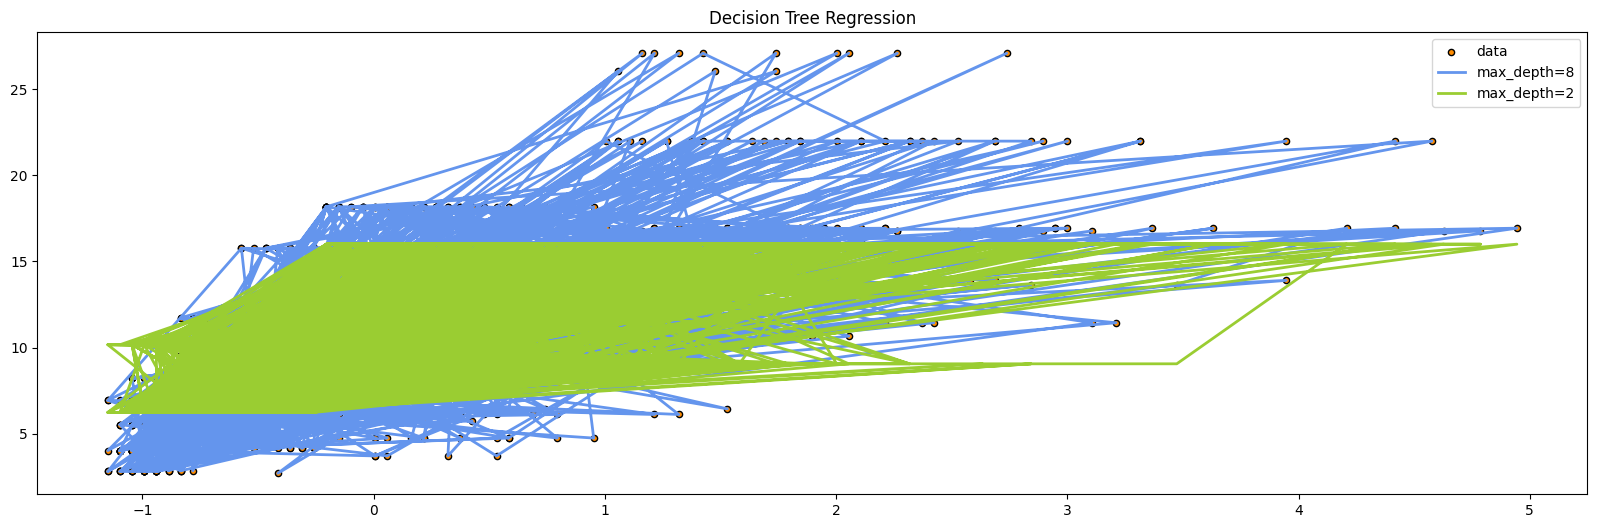

In [460]:
plt.figure(figsize=(20, 6))
plt.scatter(X_test["ast"], y_pred, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test["ast"], y_pred, color="cornflowerblue", label="max_depth=8", linewidth=2)
plt.plot(X_test["ast"], y_pred2, color="yellowgreen", label="max_depth=2", linewidth=2)
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

El siguiente algoritmo a probar es el árbol de decisión. La primera versión ha sido la misma que con las regresiones, he probado de usar los datos de las 5 variables más importantes combinando PCA y información mutua y gracias al Grid Search he escogido la máxima profundidad óptima para maximizar la precisión. Los resultados no son demasiado buenos, se observa una R^2 de 0,66 y el error vuelve a estar por encima de las 3 unidades.

A continuación, he querido graficar una comparativa entre el árbol de decisión con una profundidad máxima de 2 y el que nos ha salido como el óptimo, 6. En el primer gráfico, he querido separar ambos modelos. Hay que tener cuidado porque la escala es diferente, pero realmente se observan gráficos muy distintos. Inicialmente, al verlos pensé que era porque estaba usando distintos datos, pero después de comprobar varias veces, me di cuenta que sencillamente el modelo de una profundidad máxima igual a 2 no predice una serie de valores, evidenciando que es un modelo mucho peor al otro a nivel predictivo.

**Parametrización del Árbol de Decisión:**

In [355]:
time_1 = time.time()
arbol3 = DecisionTreeRegressor(random_state=79)
arbol3.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 79,
 'splitter': 'best'}

In [356]:
# Búsqueda del mejor parámetro
param_grid3 = {'max_depth': [2, 4, 6, 8],
              'criterion': ['squared_error','friedman_mse','absolute_error','poisson']}
arbolgrid3 = GridSearchCV(arbol, param_grid3, cv=3, scoring= "r2")

arbolgrid3.fit(X_train, y_train)

print("Mejores parámetros:", arbolgrid3.best_params_)

Mejores parámetros: {'criterion': 'poisson', 'max_depth': 8}


In [357]:
arbol_poisson = arbolgrid3.best_estimator_

time_2 = time.time()
total_time = time_2 - time_1
print(f'Tiempo de ejecución del Árbol de Decisión parametrizado: {total_time} segundos')

# Evaluar el modelo
y_pred = arbol_poisson.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coeficiente de determinación (R^2): {:.4f}".format(r2))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Tiempo de ejecución del Árbol de Decisión parametrizado: 4.022279739379883 segundos
Coeficiente de determinación (R^2): 0.6638
Root Mean Squared Error (RMSE): 3.35


He introducido los cuatro criterios disponibles para el árbol de decisión para, usando GridSearch, no solo intentar elegir el max_depth óptimo para el modelo, sino también tener el mejor criterio. Finalmente, usando el de Poisson y con un poco más de densidad permitida que en el anterior modelo, los resultados son prácticamente idénticos.

**Árbol con todas las variables**

In [358]:
time_1 = time.time()
arbol_all = DecisionTreeRegressor(random_state=79)
arbol_all.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 79,
 'splitter': 'best'}

In [359]:
# Búsqueda del mejor parámetro
param_grid4 = {'max_depth': [2, 4, 6, 8],
              'criterion': ['squared_error','friedman_mse','absolute_error','poisson']}
arbolgrid4 = GridSearchCV(arbol_all, param_grid3, cv=3, scoring= "r2")

arbolgrid4.fit(X_train_all, y_train_all)

print("Mejores parámetros:", arbolgrid4.best_params_)

Mejores parámetros: {'criterion': 'poisson', 'max_depth': 8}


In [360]:
arbol_all = arbolgrid4.best_estimator_

time_2 = time.time()
total_time = time_2 - time_1
print(f'Tiempo de ejecución del Árbol de Decisión con todas las variables: {total_time} segundos')

# Evaluar el modelo
y_pred = arbol_all.predict(X_test_all)

r2 = r2_score(y_test_all, y_pred)
mse = mean_squared_error(y_test_all, y_pred)
rmse = np.sqrt(mse)

print("Coeficiente de determinación (R^2): {:.4f}".format(r2))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Tiempo de ejecución del Árbol de Decisión con todas las variables: 6.677021026611328 segundos
Coeficiente de determinación (R^2): 0.6491
Root Mean Squared Error (RMSE): 3.43


Por último, he usado otra vez GridSearch para escoger entre los mejores criterios y profundidades y, en este caso, he usado los datos de todas las variables (las 9 variables que mejor resultado han dado en las regresiones).

Se observa que el resultado de este último modelo es incluso peor que el modelo con el que estábamos trabajando antes.

**Tiempos de ejecucuión**

También son interesantes los tiempos de ejecución que se obtienen en los tres modelos. Sabiendo que los árboles de decisión tienden a ser más lentos que las regresiones, he decidido medir el tiempo de ejecución para comparar cada uno de los tres árboles que he propuesto. Con los resultados se observa que el tiempo ha ido creciendo conforme se añadía complejidad al modelo (últimos dos modelos) y conforme aumentaban el nombre de variables (último modelo).

Es interesante tener esta información porque realmente, viendo que los resultados son prácticamente iguales, puede que no merezca la pena complicar un modelo si no vemos unos beneficios importantes.

# Parte Opcional: Clasificación

Para la parte opcional, nos dedicaremos primero a hacer un modelo de clasificación del dataset que hemos usado hasta ahora, nba_recent. Este conjunto de datos no tiene valores nulos, pero sí que ha visto reducida su cantidad de observaciones porque hemos eliminado el 5% de nulos que habíamos creado artificialmente.

A continuación, intentaremos predecir, con el mejor modelo de regresión creado en esta entrega, las observaciones nulas. Y, con estas observaciones rellenadas, haremos un segundo modelo de clasificación con todos los datos.

# Regresión Logística: Draft Round

Sin ser un grandísimo modelo, el que mejor nos funcionó para la entrega de clasificación fue la regresión logística para predecir la variable 'draft_round'. Así que es el que probaremos de usar.

Como 'draft_round' ha sido eliminada al principio de la entrega, habrá que crear esta variable de nuevo basándonos en el 'draft_number'. (La primera ronda del draft es del 1 al 30 y la segunda del 31 al 60).

In [361]:
nba_recent.head()

age draft_number  gp   pts  reb  ast  net_rating  oreb_pct  ts_pct  \
2639  26.0           12  75   4.4  2.9  0.6        -5.3     0.076   0.451   
2640  30.0           21  69  19.3  5.8  3.0        12.6     0.044   0.514   
2641  40.0            3  82  20.0  6.1  3.8         0.0     0.028   0.491   
2643  23.0           43  82  15.1  4.5  1.4         2.6     0.050   0.590   
2645  27.0           48  82   9.4  3.9  1.0        -3.0     0.063   0.459   

      season  
2639       3  
2640       3  
2641       3  
2643       3  
2645       3

In [362]:
print(len(nba_recent))

6780


In [363]:
nba_opcional = nba_recent

In [364]:
nba_opcional['draft_number'] = pd.to_numeric(nba_opcional['draft_number'], errors='coerce')

nba_opcional['draft_round'] = np.where(nba_opcional['draft_number'] > 30, 2,
                                       np.where(nba_opcional['draft_number'] <= 30, 1, 3))


In [365]:
round3 = nba_opcional['draft_round'] == 3
nba = opcional = nba_opcional.drop(nba_opcional[round3].index)
nba_opcional = nba_opcional.drop(columns = ['draft_number'])
nba_opcional.head()

age  gp   pts  reb  ast  net_rating  oreb_pct  ts_pct  season  \
2639  26.0  75   4.4  2.9  0.6        -5.3     0.076   0.451       3   
2640  30.0  69  19.3  5.8  3.0        12.6     0.044   0.514       3   
2641  40.0  82  20.0  6.1  3.8         0.0     0.028   0.491       3   
2643  23.0  82  15.1  4.5  1.4         2.6     0.050   0.590       3   
2645  27.0  82   9.4  3.9  1.0        -3.0     0.063   0.459       3   

      draft_round  
2639            1  
2640            1  
2641            1  
2643            2  
2645            2

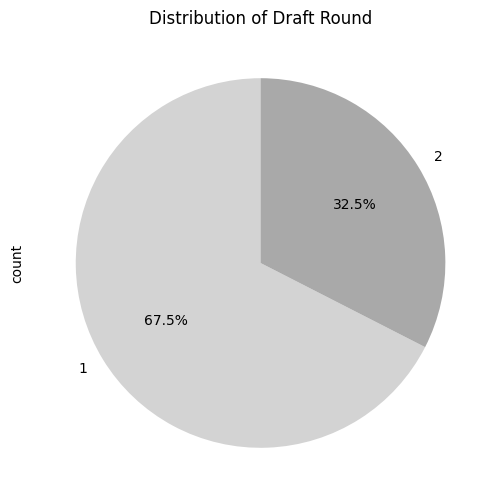

In [366]:
colors = ['lightgray', 'darkgray', 'orange']

plt.figure(figsize=(6, 6))
nba_opcional['draft_round'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
)
plt.title('Distribution of Draft Round')
plt.show()

In [367]:
# Balanceamos los datos
draft_1 = 1
draft_2 = 2
reduced_1 = 0.50
reduced_2 = 0.01

indices1 = nba_opcional[nba_opcional['draft_round'] == draft_1].index
indices2 = nba_opcional[nba_opcional['draft_round'] == draft_2].index

np.random.seed(79)

reduced1 = np.random.choice(indices1, size=int(len(indices1) * reduced_1), replace=False)
reduced2 = np.random.choice(indices2, size=int(len(indices2) * reduced_2), replace=False)

balanced_nba = nba_opcional.drop(set(reduced1).union(set(reduced2)))

In [368]:
round1 = balanced_nba[balanced_nba['draft_round'] == 1]
round2 = balanced_nba[balanced_nba['draft_round'] == 2]

print(len(round1))
print(len(round2))

2288
2183


In [369]:
X = balanced_nba.drop(columns=['draft_round'])
y = balanced_nba['draft_round']

# Normalizamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividimos el data set entre train y test
X_train_opcional, X_test_opcional, y_train_opcional, y_test_opcional = train_test_split(X, y, test_size=0.2, random_state=33)

# Modelo de Regresión Logística
model = LogisticRegression(random_state=79)
model.fit(X_train_opcional, y_train_opcional)

print('Training Data:', len(X_train_opcional))
print('Testing Data:', len(y_test_opcional))

Training Data: 3576
Testing Data: 895


Accuracy: 0.65

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.59      0.64       476
           2       0.61      0.73      0.66       419

    accuracy                           0.65       895
   macro avg       0.66      0.66      0.65       895
weighted avg       0.66      0.65      0.65       895



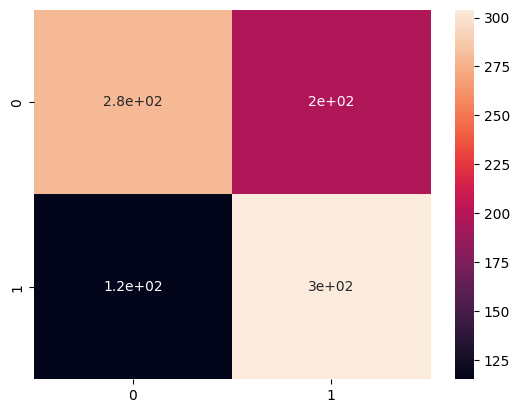

In [370]:
# Predicciones
y_pred = model.predict(X_test_opcional)

# Evaluamos el modelo
accuracy = accuracy_score(y_test_opcional, y_pred)
conf_matrix = confusion_matrix(y_test_opcional, y_pred)
classification_rep = classification_report(y_test_opcional, y_pred)

# Resultados del modelo
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)

Después de crear la clase, balancear los datos y normalizarlos, hemos creado un primer modelo con un dataset en el que habíamos eliminado el 5% de las observaciones del data set inicial. Al hacerlo, hemos obtenido unos resultados un poco mejores a los obtenidos a la entrega anterior. Esto lo puede explicar un poco el factor aleatorio y, a su vez, el hecho que para esta entrega se está usando una cantidad de datos superior.

**Segundo modelo con nulos predichos**

In [371]:
variables = ['ast','reb','draft_number','ts_pct','gp','net_rating','oreb_pct','age','season']
observaciones = nba_recent_null[nba_recent_null['pts'].isnull()]

In [372]:
var_pred = observaciones[variables]
norm = scaler.fit_transform(var_pred)

In [373]:
# Predicciones
poly = PolynomialFeatures(2)
preprediction = poly.fit_transform(norm)

prediccion_null = poly_model2.predict(preprediction)

In [374]:
nba_recent_wnull.loc[nba_recent_wnull['pts'].isnull(),'pts'] = prediccion_null

In [375]:
nba_recent_wnull.isnull().sum()

age             0
draft_number    0
gp              0
pts             0
reb             0
ast             0
net_rating      0
oreb_pct        0
ts_pct          0
season          0
pts_class       0
dtype: int64

In [376]:
print(len(nba_recent_wnull))

7154


Para empezar el segundo modelo hemos decidido completar la información de las observaciones de las que inicialmente habíamos eliminado sus valores para la variable objetivo de las regresiones. Para completar estas observaciones hemos usado el modelo que mejor resultados nos ha dado en esta entrega, que es el modelo de regresión polinómica con todas las variables. Una vez hemos predicho el valor de 'pts' de estas observaciones, hemos completado el dataset que inicialmente tenía nulos en este 5% de observaciones.

In [377]:
nba_opcional2 = nba_recent_wnull.drop(columns = 'pts_class')

In [378]:
nba_opcional2['draft_number'] = pd.to_numeric(nba_opcional2['draft_number'], errors='coerce')

nba_opcional2['draft_round'] = np.where(nba_opcional2['draft_number'] > 30, 2,
                                       np.where(nba_opcional2['draft_number'] <= 30, 1, 3))

In [379]:
round3 = nba_opcional2['draft_round'] == 3
nba_opcional2 = nba_opcional2.drop(nba_opcional2[round3].index)
nba_opcional2 = nba_opcional2.drop(columns = ['draft_number'])

In [380]:
nba_opcional2.head()

age  gp   pts  reb  ast  net_rating  oreb_pct  ts_pct  season  \
2639  26.0  75   4.4  2.9  0.6        -5.3     0.076   0.451       3   
2640  30.0  69  19.3  5.8  3.0        12.6     0.044   0.514       3   
2641  40.0  82  20.0  6.1  3.8         0.0     0.028   0.491       3   
2643  23.0  82  15.1  4.5  1.4         2.6     0.050   0.590       3   
2645  27.0  82   9.4  3.9  1.0        -3.0     0.063   0.459       3   

      draft_round  
2639            1  
2640            1  
2641            1  
2643            2  
2645            2

In [381]:
# Balanceamos los datos
draft_1 = 1
draft_2 = 2
reduced_1 = 0.50
reduced_2 = 0.01

indices1 = nba_opcional2[nba_opcional2['draft_round'] == draft_1].index
indices2 = nba_opcional2[nba_opcional2['draft_round'] == draft_2].index

np.random.seed(79)

reduced1 = np.random.choice(indices1, size=int(len(indices1) * reduced_1), replace=False)
reduced2 = np.random.choice(indices2, size=int(len(indices2) * reduced_2), replace=False)

balanced_nba2 = nba_opcional2.drop(set(reduced1).union(set(reduced2)))

round1 = balanced_nba2[balanced_nba2['draft_round'] == 1]
round2 = balanced_nba2[balanced_nba2['draft_round'] == 2]

print(len(round1))
print(len(round2))

2405
2321


In [382]:
X = balanced_nba2.drop(columns=['draft_round'])
y = balanced_nba2['draft_round']

# Normalizamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividimos el data set entre train y test
X_train_opcional2, X_test_opcional2, y_train_opcional2, y_test_opcional2 = train_test_split(X, y, test_size=0.2, random_state=33)

# Modelo de Regresión Logística
model_2 = LogisticRegression(random_state=79)
model_2.fit(X_train_opcional2, y_train_opcional2)

print('Training Data:', len(X_train_opcional2))
print('Testing Data:', len(y_test_opcional2))

Training Data: 3780
Testing Data: 946


Accuracy: 0.63

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.58      0.61       467
           2       0.63      0.69      0.66       479

    accuracy                           0.63       946
   macro avg       0.64      0.63      0.63       946
weighted avg       0.64      0.63      0.63       946



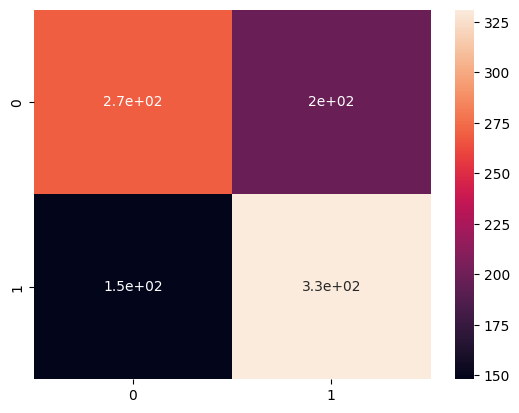

In [383]:
# Predicciones
y_pred = model_2.predict(X_test_opcional2)

# Evaluamos el modelo
accuracy = accuracy_score(y_test_opcional2, y_pred)
conf_matrix = confusion_matrix(y_test_opcional2, y_pred)
classification_rep = classification_report(y_test_opcional2, y_pred)

# Resultados del modelo
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)

Una vez tenemos el dataset completo, solo faltaba comprobar como funcionaba con un nuevo modelo de regresión logística. Si nos fijamos en les resultados de ambos y los comparamos, veremos que la precisión de este segundo se ve reducida un 2%. Es una pequeña diferencia, pero aunque hayamos aumentado la cantidad de datos, vemos como la calidad disminuye.

Puede deberse a diversos factores, pero bajo mi punto de vista, el principal es que estamos completando estos datos faltantes con un modelo de regresión que solo predice con una precisión del 75%. Debido a esto, una parte de los valores con los que hemos completado el dataset puede que sean erróneos y afecten a la precisión de este segundo modelo.

# Conclusiones

Este sido un nuevo y extenso análisis sobre el dataset de la NBA, con la pequeña novedad de que he querido indagar un poco más e intentar (de forma poco satisfactoria) investigar sobre los outliers que teníamos en cada variable para después tomar la decisión de eliminarlos o no.

En este caso, he probado de predecir los puntos anotados por cada jugador en función a una serie de variables. Estas variables las he seleccionado después de aplicar diversos estudios de correlación, información mutua y de componentes. Con todos ellos he llegado a conclusiones no siempre compartidas pero me han ayudado a tener una idea más clara de que variables eran las más importantes para la variable objetivo y cuáles se podían excluir del modelo.

A partir de aquí he empezado aplicando los algoritmos de regresión lineal y polinómica. Como no tenía claras más métodos de selección de variables, he decidido probar distintos modelos con diversos conjuntos de variables. El resultado más alto ha sido el que incluía a las 9 variables que he escogido después del primer filtro, el análisis de correlaciones.

A continuación también he querido ver los resultados con el árbol de decisión. Para este algoritmo he hecho dos pruebas iniciales, una usando solo GridSearch para seleccionar la profundidad del árbol (asumiendo un posible sobreentrenamiento) y una segunda añadiendo también diversas opciones en 'criterion'. Por último, también he querido probar un último modelo parametrizando el árbol, pero y añadiendo todas las variables (el conjunto que mejor había funcionado anteriormente) pero ha seguido sin dar buenos resultados, siempre peores que en las regresiones.

Por último, en la parte optativa he usado el mejor modelo, la regresión, para predecir una serie de valores nulos en la variable objetivo posteriormente usar este dataset para la clasificación de una variable categórica. Merce la pena decir que aunque el modelo final es flojo, y la regresión tampoco era demasiado precisa, esperaba unos peores resultados al hacer esta combinación, y la verdad es que la perdida de precisión no ha sido excesivamente alta.

Como conclusión final, es probable que la variable puntos sea una variable complicada de predecir por las divergencias que hay entre jugadores y la precisión necesaria, así que no tengo demasiado claro si ha sido una gran decisión escogerla como variable objetivo. Dicho esto, es un comentario similar al que he hecho en las anteriores entregas, así que igual tengo que mejorar este aspecto :)